# Credit EDA Assignment 

In this case study we have to predict whether a client will default on their loan payments and understand borrower behavior by conducting exploratory data analysis on the dataset containing information about loan applicants and their previous credit history.

#### Problem Statement

The task involves conducting Exploratory Data Analysis (EDA) on loan application data for a consumer finance company. The company aims to identify patterns indicating whether a client is likely to have difficulty paying their instalments, with the goal of minimizing the risk of default. There are three files used in this dataset:
-  application_data.csv (contains all the information of the client at the time of application) 
-  previous_application.csv (contains information about the client’s previous loan data)
-  columns_description.csv (data dictionary which describes the meaning of the variables)

#### What does it mean by loan default?
Loan default, also known as Non-Performing Asset (NPA), refers to a situation where a borrower fails to repay a loan according to the terms agreed upon with the lender.

#### Two types of risks are associated with the bank’s decision:
-  If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company
-  If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

#### Objective:
Analyze the dataset of loan applicants and their financial attributes to identify patterns contributing to loan default. Based on observations, propose approaches to help the financial institution target variables associated with loan default risk.

In [1]:
# Importing all necessary libraries
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Import warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# To display maximum number of rows and columns from the datasets
pd.set_option("display.max_rows",None)    # None is for "no limit" 
pd.set_option("display.max_columns",None)  # None is set for "no limit"

## Data Loading

In [4]:
df = pd.read_csv("application_data.csv")

## Data Understanding

#### Checking the structure of the dataframe

In [5]:
# reading dataset
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [6]:
# checking the last 3 rows
df.tail(3)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,Unaccompanied,Working,Higher education,Separated,House / apartment,0.005002,-14966,-7921,-6737.0,-5150,NaN,1,1,0,1,0,1,Managers,1.0,3,3,THURSDAY,9,0,0,0,0,1,1,School,0.744026,0.535722,0.218859,0.1031,0.0862,0.9816,0.7484,0.0123,0.00,0.2069,0.1667,0.2083,NaN,0.0841,0.9279,0.0,0.0,0.1050,0.0894,0.9816,0.7583,0.0124,0.0000,0.2069,0.1667,0.2083,NaN,0.0918,0.9667,0.0,0.0,0.1041,0.0862,0.9816,0.7518,0.0124,0.00,0.2069,0.1667,0.2083,NaN,0.0855,0.9445,0.0,0.0,reg oper account,block of flats,0.7970,Panel,No,6.0,0.0,6.0,0.0,-1909.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,319500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.005313,-11961,-4786,-2562.0,-931,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,9,0,0,0,1,1,0,Business Entity Type 1,NaN,0.514163,0.661024,0.0124,NaN,0.9771,NaN,NaN,NaN,0.0690,0.0417,NaN,NaN,NaN,0.0061,NaN,NaN,0.0126,NaN,0.9772,NaN,NaN,NaN,0.0690,0.0417,NaN,NaN,NaN,0.0063,NaN,NaN,0.0125,NaN,0.9771,NaN,NaN,NaN,0.0690,0.0417,NaN,NaN,NaN,0.0062,NaN,NaN,NaN,block of flats,0.0086,"Stone, brick",No,0.0,0.0,0.0,0.0,-322.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307510,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,675000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.046220,-16856,-1262,-5128.0,-410,NaN,1,1,1,1,1,0,Laborers,2.0,1,1,THURSDAY,20,0,0,0,0,1,1,Business Entity Type 3,0.734460,0.708569,0.113922,0.0742,0.0526,0.9881,NaN,0.0176,0.08,0.0690,0.3750,NaN,NaN,NaN,0.0791,NaN,0.0,0.0756,0.0546,0.9881,NaN,0.0178,0.0806,0.0690,0.3750,NaN,NaN,NaN,0.0824,NaN,0.0,0.0749,0.0526,0.9881,NaN,0.0177,0.08,0.0690,0.

In [7]:
# getting the shape of the datset
df.shape

(307511, 122)

In [8]:
# concise summary of the DataFrame's structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


***Insights***
- There are 122 columns and 307,511 rows
- There are three data types here:
    -  65 columns have floating-point data type
    -  41 columns are integer data type
    -  16 columns are of object data type

In [9]:
# checking the list containing all the column names
df.columns.tolist()

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_A

In [10]:
# checking the data types of all the columns
df.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


In [11]:
# getting the descriptive statistics of the numerical columns in a DataFrame
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [12]:
# we saw there are 65 floating-point dtype columns and 41 integer dtype columns, so just to re-check length of numerical columns used for above statistical calculations 
len(df.describe().columns) 

106

***Insights***
-  We can see in the list of column names, the names of the columns are without spaces so we don't need to re-name any, since renaming columns without spaces can simplify the code and make it more readable.  
-  From the above statistics, we have 106 numerical columns.
-  In the 'count' calculation that gives number of non-null values is not same for all the columns thus indicating missing values present in the dataset, so we need to identify and address those missing values before analysing data to gain proper insights. 


## Data Cleaning and Manipulation

In [13]:
# Calculating percentage of missing values
percentage_of_missing_values =  (df.isnull().mean()) * 100

# using pd.DataFrame() to get a well-structured tabular format
missing_values_df = pd.DataFrame({'percentage_of_missing_values': percentage_of_missing_values})

# sorting the DataFrame by the percentage of missing values in descending order
missing_values_df = missing_values_df.sort_values(by='percentage_of_missing_values', ascending=False)

missing_values_df

,percentage_of_missing_values
COMMONAREA_MEDI,69.872297
COMMONAREA_AVG,69.872297
COMMONAREA_MODE,69.872297
NONLIVINGAPARTMENTS_MODE,69.432963
NONLIVINGAPARTMENTS_AVG,69.432963
NONLIVINGAPARTMENTS_MEDI,69.432963
FONDKAPREMONT_MODE,68.386172
LIVINGAPARTMENTS_MODE,68.354953
LIVINGAPARTMENTS_AVG,68.354953
LIVINGAPARTMENTS_MEDI,68.354953


In [14]:
# total number of columns with missing values
(df.isnull().sum()>0).sum()

67

In [15]:
# subsetting missing values above 50% 
missing_values_abv_50 = percentage_of_missing_values[percentage_of_missing_values > 50]
missing_values_abv_50

OWN_CAR_AGE                 65.990810
EXT_SOURCE_1                56.381073
APARTMENTS_AVG              50.749729
BASEMENTAREA_AVG            58.515956
YEARS_BUILD_AVG             66.497784
COMMONAREA_AVG              69.872297
ELEVATORS_AVG               53.295980
ENTRANCES_AVG               50.348768
FLOORSMIN_AVG               67.848630
LANDAREA_AVG                59.376738
LIVINGAPARTMENTS_AVG        68.354953
LIVINGAREA_AVG              50.193326
NONLIVINGAPARTMENTS_AVG     69.432963
NONLIVINGAREA_AVG           55.179164
APARTMENTS_MODE             50.749729
BASEMENTAREA_MODE           58.515956
YEARS_BUILD_MODE            66.497784
COMMONAREA_MODE             69.872297
ELEVATORS_MODE              53.295980
ENTRANCES_MODE              50.348768
FLOORSMIN_MODE              67.848630
LANDAREA_MODE               59.376738
LIVINGAPARTMENTS_MODE       68.354953
LIVINGAREA_MODE             50.193326
NONLIVINGAPARTMENTS_MODE    69.432963
NONLIVINGAREA_MODE          55.179164
APARTMENTS_M

In [16]:
len(missing_values_abv_50)

41

***Insights***
-  41 columns high percentage missing values indicating that these might not provide useful information for analysis and can lead to unreliable or skewed outcomes. 

-  Few of the variables such as COMMONAREA_MEDI/ COMMONAREA_AVG/ COMMONAREA_MODE representing the common area space, similarly, OWN_CAR_AGE variable indicating the age of the client's car, while relevant for assessing the client's assets, missing values may not strongly impact loan default prediction and also there are many other varibales to capture the client's financial stability to better predict loan default, therefore dropping columns with high missing values may not lead to information loss.

-  Dropping columns with high missing values can improve computational efficiency

In [17]:
# listing high percentage missing values, here threshold to consider is taken as 50%
drop_columns_abv_50 = missing_values_abv_50.index.tolist()
print(drop_columns_abv_50) 

['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE']


In [18]:
# recheck number of columns to drop
len(drop_columns_abv_50)

41

In [19]:
# dropping high percentage missing values
df.drop(drop_columns_abv_50 , axis =1 , inplace =True)

In [20]:
# rechecking columns
df.shape

(307511, 81)

*"After dropping higher percentage missing values we are left with 81 columns"*

In [21]:
# rechecking which columns have missing values 
rest_of_missing_values = (df.isnull().mean() * 100)[(df.isnull().mean() * 100) > 0].sort_values(ascending=False)
rest_of_missing_values

FLOORSMAX_AVG                   49.760822
FLOORSMAX_MODE                  49.760822
FLOORSMAX_MEDI                  49.760822
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BEGINEXPLUATATION_MODE    48.781019
YEARS_BEGINEXPLUATATION_MEDI    48.781019
TOTALAREA_MODE                  48.268517
EMERGENCYSTATE_MODE             47.398304
OCCUPATION_TYPE                 31.345545
EXT_SOURCE_3                    19.825307
AMT_REQ_CREDIT_BUREAU_HOUR      13.501631
AMT_REQ_CREDIT_BUREAU_QRT       13.501631
AMT_REQ_CREDIT_BUREAU_MON       13.501631
AMT_REQ_CREDIT_BUREAU_WEEK      13.501631
AMT_REQ_CREDIT_BUREAU_DAY       13.501631
AMT_REQ_CREDIT_BUREAU_YEAR      13.501631
NAME_TYPE_SUITE                  0.420148
DEF_30_CNT_SOCIAL_CIRCLE         0.332021
OBS_60_CNT_SOCIAL_CIRCLE         0.332021
DEF_60_CNT_SOCIAL_CIRCLE         0.332021
OBS_30_CNT_SOCIAL_CIRCLE         0.332021
EXT_SOURCE_2                     0.214626
AMT_GOODS_PRICE                  0.090403
AMT_ANNUITY                      0

In [22]:
len(rest_of_missing_values)

26

***Insights***
-  26 variables have percentage missing values between 14% to 49%.
    -  FLOORSMAX_AVG, FLOORSMAX_MODE, FLOORSMAX_MEDI: These variables represent information about the maximum number of floors in the building. Imputing average or median values may not accurately represent the characteristics of these buildings.
    -  TOTALAREA_MODE: This variable represents the total area of the property. Imputing values for this variable may affect analyses that rely on property size as a predictor of loan default risk.
    -  OCCUPATION_TYPE: This variable represents the type of occupation of the applicant. Imputing values for this variable may not be appropriate as occupation type is a categorical variable with strong relationships with loan default. But since we might need this variable for analysis and missing values will give us skewed observations, lets check in detail, data present in this variable.
    -  EXT_SOURCE_3:This variable is a normalized score from external data sources. Imputation may distort the distribution of credit scores and lead to inaccurate predictions of loan default risk. But since we might need this variable for analysis and missing values will give us skewed observations, lets check in detail, data present in this variable.
    -  AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_MON, etc representing the number of inquiries to the Credit Bureau are indicative of the client's credit behavior and financial activity. Imputing missing values will reflect the client's credit inquiry history.

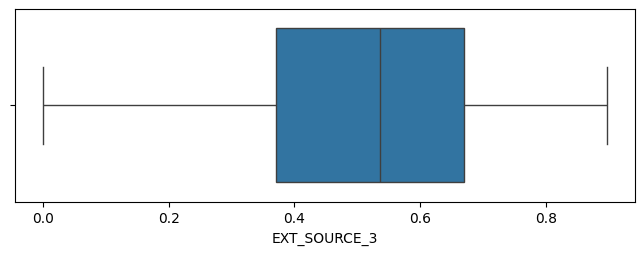

In [23]:
plt.figure(figsize = (8,2.5))
sns.boxplot(x = df["EXT_SOURCE_3"])
plt.show()

***Insights***
-  Since there are no outliers present in EXT_SOURCE_3, we can use mean to impute for the missing values as we know that mean is not heavily influenced by extreme values, so imputing missing values with the mean will not introduce significant distortion to the distribution of the data.
-  Approach: df['EXT_SOURCE_3'] = df['EXT_SOURCE_3'].fillna(df['EXT_SOURCE_3'].mean())

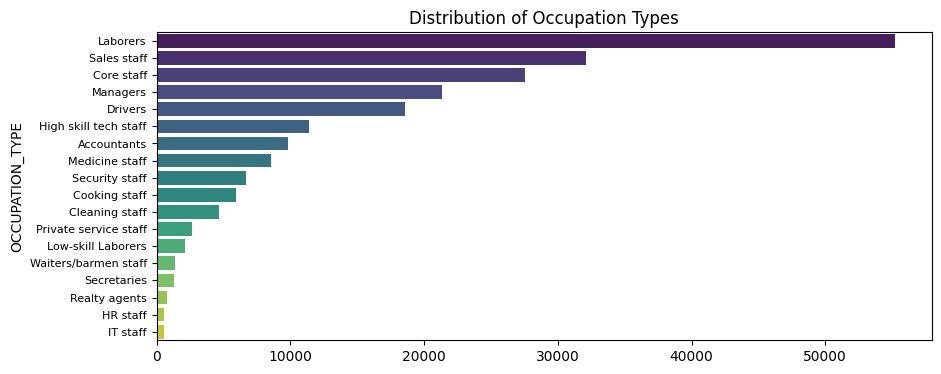

The number of missing values in OCCUPATION_TYPE variable:  96391


In [24]:
# Filter out missing values to understand what imputation method can we use for OCCUPATION_TYPE variable
occupation_counts = df['OCCUPATION_TYPE'].dropna().value_counts()  # temporarily exclude missing values and store it in a variable

# Plot to check the most popular occupation
plt.figure(figsize=(10, 4))
sns.barplot(x=occupation_counts.values, y=occupation_counts.index, palette='viridis')

plt.title('Distribution of Occupation Types')
plt.yticks(fontsize=8)
plt.show()
print("The number of missing values in OCCUPATION_TYPE variable: ", df['OCCUPATION_TYPE'].isnull().sum())

***Insights***
-  Imputing missing data for OCCUPATION_TYPE with mode i.e. "Laborers" which looks like the most popular occupation type , might introduce bias and distort the data. Since the missing values in this variable are quite high (96391), any imputation method could potentially skew the distribution towards the most common occupation type. We could probably treat missing data as a separate category and assign them as "unknown".
-  Approach: df['OCCUPATION_TYPE'].fillna('unknown', inplace=True)

In [25]:
# check for below 13% missing values
print(rest_of_missing_values[rest_of_missing_values <= 13])

NAME_TYPE_SUITE             0.420148
DEF_30_CNT_SOCIAL_CIRCLE    0.332021
OBS_60_CNT_SOCIAL_CIRCLE    0.332021
DEF_60_CNT_SOCIAL_CIRCLE    0.332021
OBS_30_CNT_SOCIAL_CIRCLE    0.332021
EXT_SOURCE_2                0.214626
AMT_GOODS_PRICE             0.090403
AMT_ANNUITY                 0.003902
CNT_FAM_MEMBERS             0.000650
DAYS_LAST_PHONE_CHANGE      0.000325
dtype: float64


***Insights***:
-  10 variables with a low percentage of missing values from 0 to 0.5%.
-  Variables such as DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE, OBS_30_CNT_SOCIAL_CIRCLE are variables that represent counts or frequencies and could be considered categorical, here imputing the mode would be more appropriate. 

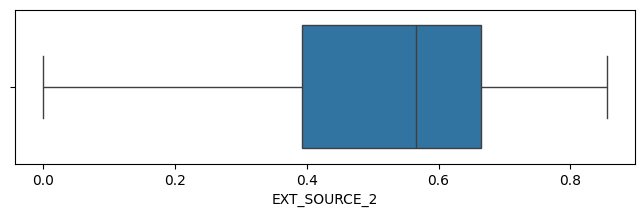

In [26]:
# identify any potential outliers  for the variable EXT_SOURCE_2
plt.figure(figsize = (8,2))
sns.boxplot(x=df["EXT_SOURCE_2"])
plt.show()

In [27]:
df['EXT_SOURCE_2'].describe()

count    3.068510e+05
mean     5.143927e-01
std      1.910602e-01
min      8.173617e-08
25%      3.924574e-01
50%      5.659614e-01
75%      6.636171e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64

***Insights***
-  For EXT_SOURCE_2 there are no outliers and the mean and median are close to each other, therefore we can use mean value for imputation as it may prove slightly more efficient than imputing median.
-  Approach: df['EXT_SOURCE_2'] = df['EXT_SOURCE_2'].fillna(df['EXT_SOURCE_2'].mean())

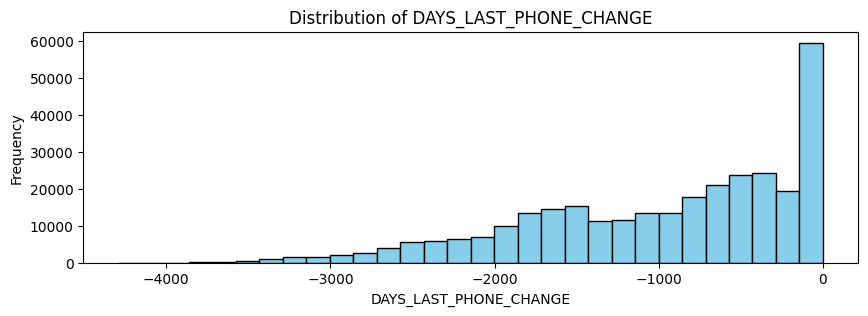

In [28]:
# to understand the distribution of the variable DAYS_LAST_PHONE_CHANGE 
plt.figure(figsize=(10, 3))
plt.hist(df['DAYS_LAST_PHONE_CHANGE'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of DAYS_LAST_PHONE_CHANGE')
plt.xlabel('DAYS_LAST_PHONE_CHANGE')
plt.ylabel('Frequency')
plt.show()

***Insights***
- We can observe a left-skewed distribution in the histogram, it means that the majority of the data points are concentrated on the right side, with fewer values extending towards the left, therefore, based on the skewed distribution observed in the histogram, using the median for imputation is preferable to ensure that the imputed values are consistent with the overall distribution of the data.
-  Approach: df['DAYS_LAST_PHONE_CHANGE'] = df['DAYS_LAST_PHONE_CHANGE'].fillna(df['DAYS_LAST_PHONE_CHANGE'].median())

In [29]:
# checking for outliers in the AMT_GOODS_PRICE variable to suggest imputation method
Q1 = df['AMT_GOODS_PRICE'].quantile(0.25)
Q3 = df['AMT_GOODS_PRICE'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

outliers_above_upper_bound = df[df['AMT_GOODS_PRICE'] > upper_bound].shape[0]
print("Number of outliers above the upper bound:", outliers_above_upper_bound)

Number of outliers above the upper bound: 14728


***Insights***
- AMT_GOODS_PRICE is a continuous variable containing wide range of numerical values, and as we can see the number of outliers above upper bound are 14728. This is a significant number, these outliers may be due to high-priced goods or erroneous data entries. 
-  We can impute missing values for AMT_GOODS_PRICE with median values to maintain the central tendency of the variable while reducing the impact of outliers on the imputation process.

In [30]:
# checking for outliers in the AMT_ANNUITY variable to suggest imputation method
Q1 = df['AMT_ANNUITY'].quantile(0.25)
Q3 = df['AMT_ANNUITY'].quantile(0.75)

outliers_above_upper_bound = df[df['AMT_ANNUITY'] > (Q3 + 1.5 * (Q3 - Q1))].shape[0]
print("Number of outliers above the upper bound:", outliers_above_upper_bound)

Number of outliers above the upper bound: 7504


***Insights:***
-  For AMT_ANNUITY, given its numerical nature mean or median can be imputed but due to presence of so many outliers, then imputing median value would be more preferable, since median is less affected by outliers compared to the mean. 
-  Approach: df['AMT_ANNUITY'] = df['AMT_ANNUITY'].fillna(df['AMT_ANNUITY'].mean())

### Data Types Verification

In [31]:
df.info(verbose=True)  # verbose=True parameter to display more detailed output

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 81 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nul

### Ensuring Data Format Integrity

In [32]:
# check data for columns with days to see if they are in improper format 
df[['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']].head()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
0,-9461,-637,-3648.0,-2120,-1134.0
1,-16765,-1188,-1186.0,-291,-828.0
2,-19046,-225,-4260.0,-2531,-815.0
3,-19005,-3039,-9833.0,-2437,-617.0
4,-19932,-3038,-4311.0,-3458,-1106.0


In [33]:
# change the negative days value to positive or absolute values
columns_to_abs = ['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']

for column in columns_to_abs:
    df[column] = df[column].abs()

In [34]:
# check if now in proper format
df[['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']].head()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
0,9461,637,3648.0,2120,1134.0
1,16765,1188,1186.0,291,828.0
2,19046,225,4260.0,2531,815.0
3,19005,3039,9833.0,2437,617.0
4,19932,3038,4311.0,3458,1106.0


-  Convert days to years for the DAYS_BIRTH and DAYS_EMPLOYED columns, also use 365.25 to approximate the average length of the year more accurately.

In [35]:
df['YEARS_EMPLOYED'] = df['DAYS_EMPLOYED'] / 365.25
df['YEARS_BIRTH'] = df['DAYS_BIRTH'] / 365.25

# Drop the original columns
df.drop(['DAYS_EMPLOYED', 'DAYS_BIRTH'], axis=1, inplace=True)

In [36]:
df.head(3)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,YEARS_EMPLOYED,YEARS_BIRTH
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,1.744011,25.902806
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,3.252567,45.900068
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,4260.0,2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.616016,52.145106


***Insights***
-  Most of the variables seem to have correct data types, their are few that i think have unsuitable data type, for example the number of family members (CNT_FAM_MEMBERS) should be represented as an integer (int) data type rather than a floating-point number (float). But there are some missing values so we can not convert it into integer.

In [37]:
# to check CNT_FAM_MEMBERS variable null count
df.CNT_FAM_MEMBERS.isnull().sum()

2

***Recommendations***
-  To convert the data type from float to int, we can use the astype() method. But before converting we need to handle the missing values (NaN). One common approach is to fill missing values with -1 before converting the data type.By filling missing values with -1, you create a distinct category for missing values that can be easily identified and handled separately during analysis. Although for this EDA case study, it is not necessary to replace the missing value but since there are only 2 missing values we can fill the missing values.

In [38]:
# fill missing values with -1
df['CNT_FAM_MEMBERS'].fillna(-1, inplace=True)

# Convert to integer data type
df['CNT_FAM_MEMBERS'] = df['CNT_FAM_MEMBERS'].astype(int)

In [39]:
# check for CODE_GENDER i.e. gender variable
print(df['CODE_GENDER'].unique())
print("\n")
print(df['CODE_GENDER'].value_counts())

['M' 'F' 'XNA']


CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64


***Insights and Recommendations***
-  There is a significant imbalance in the distribution of genders, with females 'F' comprising a much larger proportion of the data compared to males 'M'. 
-  'XNA' seems to be an anomaly and may represent missing or erroneous data, thus we can impute, or remove these missing values, or encode it as a separate category.
-  But the approach we are going for is to replace the value, since the count of 'XNA' is very low and CODE_GENDER being a categorical variable, we can impute with the mode, for this case it being 'F'.

In [40]:
# replace 'XNA' with 'F' for the 'CODE_GENDER' variable
df['CODE_GENDER'].replace('XNA', 'F', inplace=True)  # Choosing to replace 'XNA' with 'F' based on its low frequency and the dominance of 'F' in the dataset

In [41]:
# Verify the Replacement
print(df['CODE_GENDER'].unique())
print(df['CODE_GENDER'].value_counts())

['M' 'F']
CODE_GENDER
F    202452
M    105059
Name: count, dtype: int64


### Segmentation of Columns

In [42]:
# to get the number of unique values for each column
unique_values_df = pd.DataFrame({'Column Name': df.columns, 'Unique Values': [df[col].nunique() for col in df.columns]})
unique_values_df = unique_values_df.sort_values(by='Unique Values')
print(unique_values_df)

                     Column Name  Unique Values
56               FLAG_DOCUMENT_5              2
21               FLAG_WORK_PHONE              2
22              FLAG_CONT_MOBILE              2
23                    FLAG_PHONE              2
24                    FLAG_EMAIL              2
63              FLAG_DOCUMENT_12              2
64              FLAG_DOCUMENT_13              2
65              FLAG_DOCUMENT_14              2
55               FLAG_DOCUMENT_4              2
66              FLAG_DOCUMENT_15              2
67              FLAG_DOCUMENT_16              2
31    REG_REGION_NOT_LIVE_REGION              2
32    REG_REGION_NOT_WORK_REGION              2
33   LIVE_REGION_NOT_WORK_REGION              2
34        REG_CITY_NOT_LIVE_CITY              2
35        REG_CITY_NOT_WORK_CITY              2
20                FLAG_EMP_PHONE              2
19                    FLAG_MOBIL              2
69              FLAG_DOCUMENT_18              2
70              FLAG_DOCUMENT_19        

***Insights and Recommendations:***
-  Categorical variables have a limited number of unique values, representing distinct categories or groups.
-  Numerical variables typically represent quantitative data with a wide range of possible values.
-  Since the dataset contains a large number of columns, manual segmentation of each variable into categorical and numerical may not be feasible. Instead, setting a threshold value, indicating limited unique values to differentiate between the two types can be more practical.
-  Additionally, variables such as 'ORGANIZATION_TYPE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', and 'AMT_REQ_CREDIT_BUREAU_YEAR' are categorical based on our understanding of the dataset.

In [43]:
# setting the threshold value as 24 for segmentation
num_cols = [col for col in df.columns[df.nunique() > 24] if col not in ['ORGANIZATION_TYPE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE','AMT_REQ_CREDIT_BUREAU_YEAR']]
cat_cols = [col for col in df.columns if col not in num_cols]

In [44]:
# Checking if data is properly segmented and matches our original dataset
len(cat_cols)+len(num_cols)==df.shape[1]

True

### Identifying Outliers

In [45]:
# get summary of statistics for the numerical columns
df[num_cols].describe()

,SK_ID_CURR,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,DAYS_LAST_PHONE_CHANGE,YEARS_EMPLOYED,YEARS_BIRTH
count,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,3.068510e+05,246546.000000,157504.000000,154491.000000,157504.000000,154491.000000,157504.000000,154491.000000,159080.000000,307510.000000,307511.000000,307511.000000
mean,278180.518577,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,4986.120328,2994.202373,5.143927e-01,0.510853,0.977735,0.226282,0.977065,0.222315,0.977752,0.225897,0.102547,962.858788,185.420239,43.906900
std,102790.175348,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,3522.886321,1509.450419,1.910602e-01,0.194844,0.059223,0.144641,0.064575,0.143709,0.059897,0.145067,0.107462,826.808487,381.776186,11.947950
min,100002.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,0.000000,0.000000,8.173617e-08,0.000527,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.503765
25%,189145.500000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,2010.000000,1720.000000,3.924574e-01,0.370650,0.976700,0.166700,0.976700,0.166700,0.976700,0.166700,0.041200,274.000000,2.554415,33.984942
50%,278202.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,4504.000000,3254.000000,5.659614e-01,0.535276,0.981600,0.166700,0.981600,0.166700,0.981600,0.166700,0.068800,757.000000,6.075291,43.121150
75%,367142.500000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,7479.500000,4299.000000,6.636171e-01,0.669057,0.986600,0.333300,0.986600,0.333300,0.986600,0.333300,0.127600,1570.000000,15.624914,53.886379
max,456255.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,24672.000000,7197.000000,8.549997e-01,0.896010,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4292.000000,999.980835,69.073238


***Insights***
-  Looks like for columns, AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE, DAYS_REGISTRATION, DAYS_ID_PUBLISH, YEARS_EMPLOYED, DAYS_LAST_PHONE_CHANGE the difference between the maximum and minimum values is significant which suggests the presence of potential outliers in these variables. 

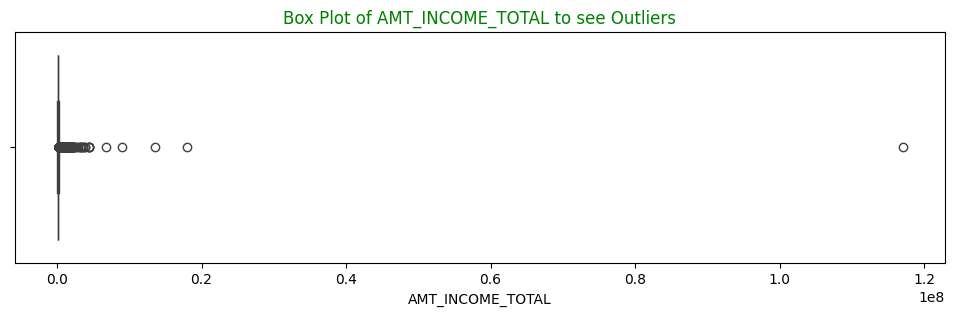

In [46]:
# checking outliers for AMT_INCOME_TOTAL 
plt.figure(figsize=[12,3])
sns.boxplot(x = df.AMT_INCOME_TOTAL)
plt.title('Box Plot of AMT_INCOME_TOTAL to see Outliers', fontdict={'fontsize': 12, 'color' : 'Green'})
plt.show()

In [47]:
q1 = df['AMT_INCOME_TOTAL'].quantile(0.25)
q3 = df['AMT_INCOME_TOTAL'].quantile(0.75)
whisker_length = 1.5
IQR = q3 - q1
lower_bound = q1 - whisker_length * IQR
upper_bound = q3 + whisker_length * IQR

outliers = [value          for value in df.AMT_INCOME_TOTAL           if value < lower_bound or value > upper_bound] # identify potential outliers
outliers.sort(reverse=True)

print("Potential Outliers:", outliers[:5]) # last 5 extreme outliers

Potential Outliers: [117000000.0, 18000090.0, 13500000.0, 9000000.0, 6750000.0]


In [48]:
df[df['AMT_INCOME_TOTAL'] > 6750000]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,YEARS_EMPLOYED,YEARS_BIRTH
12840,114967,1,Cash loans,F,N,Y,1,117000000.0,562491.0,26194.5,454500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.010643,6762.0,3643,1,1,0,1,0,0,Laborers,3,2,2,TUESDAY,14,0,0,0,0,0,0,Business Entity Type 3,0.113161,0.145543,0.9791,0.1667,0.9791,0.1667,0.9791,0.1667,0.0715,No,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,2.524298,34.537988
77768,190160,0,Cash loans,F,Y,N,0,9000000.0,1431531.0,132601.5,1377000.0,Unaccompanied,Working,Higher education,Civil marriage,House / apartment,0.010147,7276.0,1656,1,1,0,1,0,0,Managers,2,2,2,FRIDAY,13,0,0,0,0,0,0,Business Entity Type 1,0.504086,0.432962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,3.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,23.206023,44.969199
203693,336147,0,Cash loans,M,Y,Y,2,18000090.0,675000.0,69295.5,675000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.030755,3338.0,4728,1,1,0,1,0,0,NaN,4,2,2,THURSDAY,22,0,0,0,0,0,0,Business Entity Type 3,0.788606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,1133.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,13.582478,42.995209
246858,385674,0,Cash loans,M,Y,Y,0,13500000.0,1400503.5,130945.5,1368000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.030755,3953.0,4972,1,1,1,1,0,0,NaN,2,2,2,SUNDAY,12,0,0,0,0,0,0,Business Entity Type 3,0.713507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,13.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.766598,37.100616


***Insights***
-  From the boxplot, we can see there are many outliers, it's evident that most outliers in the income distribution are reasonable, particularly for individuals with higher incomes. However, there exists a single outlier of exceptionally high value.
- This high value outlier corresponds to an individual categorized as "Laborers" in the occupation type, and they are flagged with a '1' in the TARGET variable, indicating client with payment difficulties. This suggests a potential data collection error. 
-  In EDA, although it is not necessary to handle outliers, but this single data point might cause distortion during future analysis, so better to just remove this single data point.

In [49]:
# First we need to identify the index of the extreme outlier
extreme_outlier_index = df[df['AMT_INCOME_TOTAL'] == df['AMT_INCOME_TOTAL'].max()].index
# Then we need to remove/drop the extreme outlier from the dataset
df.drop(extreme_outlier_index, inplace=True)

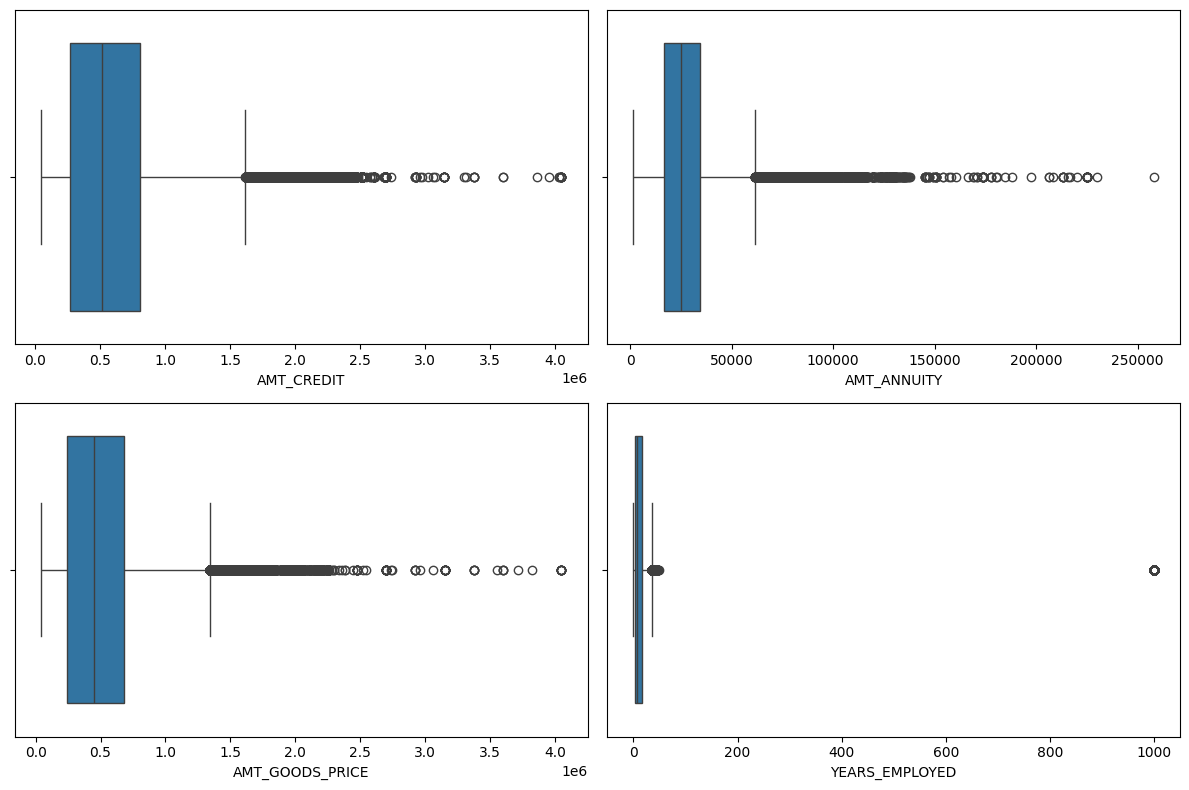

In [50]:
# Similarly we can display presence of outliers for other variables using a boxplot or scatter plot 

variables = ['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'YEARS_EMPLOYED']

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# flattening the 2D array into a 1D array 
axes = axes.flatten()

for i, variable in enumerate(variables):
    sns.boxplot(ax=axes[i], data=df, x=variable)

plt.tight_layout()  #prevent overlapping to make everything fit nicely

plt.show()

***Insights***
-  Outliers in AMT_CREDIT must have arised from clients being granted exceptionally large loan amounts, possibly for specific reasons such as substantial investments or high-income individuals seeking sizable credit.
-  AMT_ANNUITY also has signicifant number of outliers, although there might be a valid reason to have such high annuity, fr example if someone invested in a large sum Fixed Deposit then after their retirement, this FD payout might be the cause of higher value annuity, another example can be high values insurance payout.
-  AMT_GOODS_PRICE also shows a considerable presence of outliers. These outliers may arise from instances where loans are taken out for purchasing luxury items or high-value assets, leading to elevated goods prices.
-  In case if we want to remove the outliers, we can always perform capping, but for this specific case study, presence of outlier in most cases seem valid.
- Approach for capping, we can use np.where() function to cap outlier upto upper_bound limit, for example: 
>df['DAYS_REGISTRATION']=np.where(df['DAYS_REGISTRATION']>upper_bound , upper_bound,df['DAYS_REGISTRATION'])

In [51]:
# to validate outlier data points for YEARS_EMPLOYED
print(f"81.5% of the individuals in our dataset have been employed for fewer than roughly {round((df['YEARS_EMPLOYED'].quantile(0.815)) , 2)} years")

81.5% of the individuals in our dataset have been employed for fewer than roughly 33.64 years


-  The 'YEARS_EMPLOYED' variable exhibits a notable concentration of data points around the 81.5th percentile, suggesting nearly 33 years of employment, which appears reasonable. However, outliers at the extreme end, corresponding to around 999 years, suggest potential errors in data entry.
-  It would be better to remove those data points by setting a threshold value or a percentile value like: 
>percentile_threshold = df['YEARS_EMPLOYED'].quantile(0.815)<br>
 df = df[df['YEARS_EMPLOYED'] <= percentile_threshold]

### Binning

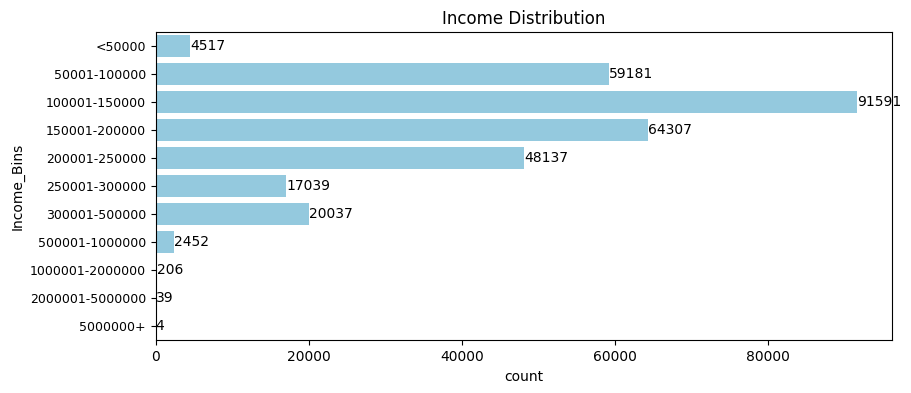

In [52]:
# Creating buckets/bins to inspect AMT_INCOME_TOTAL
income_bins = [0, 50000, 100000, 150000, 200000, 250000, 300000, 500000, 1000000, 2000000, 5000000, 20000000]

income_labels = ['<50000', '50001-100000', '100001-150000', '150001-200000', '200001-250000','250001-300000', '300001-500000', 
                 '500001-1000000', '1000001-2000000', '2000001-5000000','5000000+']

df['Income_Bins'] = pd.cut(df['AMT_INCOME_TOTAL'], bins=income_bins, labels=income_labels)

plt.figure(figsize=(9.5, 4)) 

counts = df['Income_Bins'].value_counts().sort_index()
sns.countplot(data=df, y='Income_Bins', color='skyblue', order=counts.index)
plt.yticks(fontsize=9)
plt.title('Income Distribution')

for i, count in enumerate(counts):
    plt.text(count, i, str(count), ha='left', va='center')      # Annotate each bar with its count

plt.show()

***Insights:***
-  From the graph, we can see that majority of loan applicants have incomes in the range of 1L to 1.5L

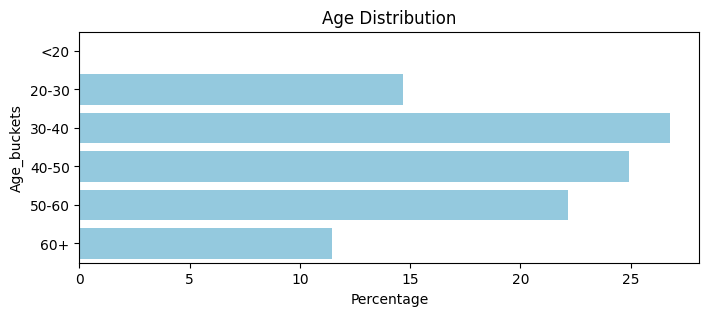

In [53]:
# Binning of AGE groups for YEARS_BIRTH variable
df['Age_buckets'] = pd.cut(df.YEARS_BIRTH, bins = [0,20,30,40,50,60,70] , labels= ['<20','20-30','30-40','40-50','50-60','60+'])

plt.figure(figsize=(8, 3)) 
sns.barplot(y=df['Age_buckets'].value_counts(normalize=True).index, x=df['Age_buckets'].value_counts(normalize=True).values * 100 , color='skyblue')

plt.xlabel('Percentage')
plt.title('Age Distribution')
plt.show()

***Insights***
-  Maximum client applying for loan fall under the age group of 30 to 40 years and then next popular age groups can be seen as 40 to 50 years which is almost 25% of the population of our collected data.

### Data Imbalace Check 

In [54]:
# percentage of each flag value in the target variable
df.TARGET.value_counts(normalize  = True)  *100

TARGET
0    91.927417
1     8.072583
Name: proportion, dtype: float64

In [55]:
# Split the DataFrame into two sub-dataframes
df_0 = df[df['TARGET'] == 0]    # Repayer/ all other cases
df_1 = df[df['TARGET'] == 1]    # Defaulter/ clients with payment difficulties/ payment delays

In [56]:
# Imbalance ratio
ratio = df_0.shape[0] / df_1.shape[0]
print("Ratio of TARGET VARIABLE", round( ratio , 2))

Ratio of TARGET VARIABLE 11.39


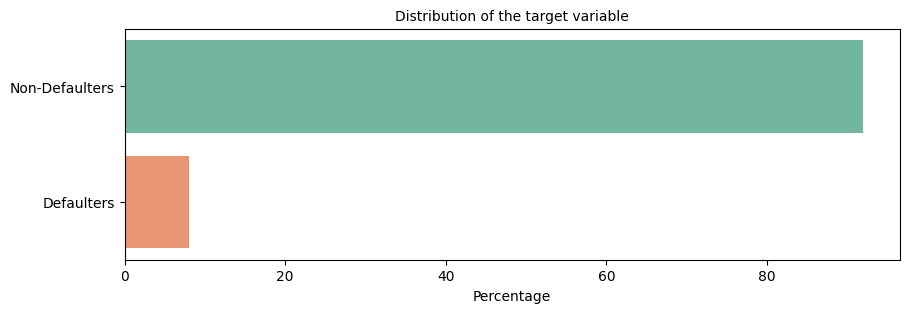

In [57]:
# Visualizing univariate characteristics of the Target variable
plt.figure(figsize= [10,3])
sns.barplot(y = ['Non-Defaulters','Defaulters'] ,  x = df["TARGET"].value_counts(normalize =True)*100, palette ="Set2")
plt.xlabel('Percentage')
plt.title("Distribution of the target variable", fontdict = {"fontsize":10})
plt.show()

***Insights***
-  Most of the data points belong to the "all other cases" category, constituting approximately 91.93%, where as clients with payment difficulties comprise a smaller proportion, i.e. approximately 8.07% of the dataset.
-  This indicates a significant imbalance, with a dominance of non-defaulters compared to clients facing payment difficulties.

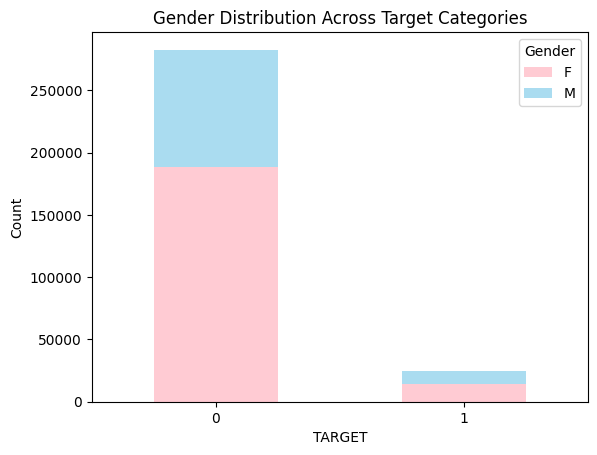

In [58]:
# Data Imbalance Check across two variables
df.groupby(['TARGET', 'CODE_GENDER']).size().unstack().plot.bar(stacked=True,  color=['lightpink', 'skyblue'] ,alpha =0.7) # size() returns a Series and unstack() converts the Series to a DataFrame so we can plot
plt.ylabel("Count")
plt.title("Gender Distribution Across Target Categories")
plt.legend(title="Gender")
plt.xticks(rotation = 0)
plt.show()

***Insights***
-  The proportion of females is higher among clients with no payment difficulties(TARGET = 0) compared to those with payment difficulties, whereas the proportion of males is higher among clients with payment difficulties compared to those with no payment difficulties.
-  Among clients with payment difficulties (TARGET = 1), their doesn't seem much of a  huge difference between proportion of females and males.
-  From plot, we can see that their is a possibility that gender might be a factor influencing financial behavior or risk profiles.

In [59]:
# we can also check the count of each gender for each target variable
pivot_table = pd.pivot_table(df, index='TARGET', columns='CODE_GENDER', aggfunc='size')
pivot_table

CODE_GENDER,F,M
TARGET,,
0,188282,94404
1,14169,10655


***Insights***
-  Female(F) non-defaulters are twice that of male(M) non-defaulters. For clients with payment difficulties i.e. TARGET==1, the difference between male defaulter and female defaulter is'nt much. 

In [60]:
# calculate few descriptive statistics on numerical features
df_stats = df.groupby('TARGET')[num_cols].agg([np.min, np.max, np.mean, np.median, np.std])

df_stats

SK_ID_CURR                                                  \
              min     max           mean    median            std   
TARGET                                                              
0          100003  456255  278244.744536  278362.5  102825.776954   
1          100002  456254  277455.713302  276293.0  102379.991502   

       AMT_INCOME_TOTAL                                                      \
                    min         max           mean    median            std   
TARGET                                                                        
0               25650.0  18000090.0  169077.722266  148500.0  110476.268524   
1               25650.0   3150000.0  160905.251551  135000.0   87306.908702   

       AMT_CREDIT                                                     \
              min        max           mean    median            std   
TARGET                                                                 
0         45000.0  4050000.0  602648.282002  517788.0  406845.907710   
1         45000.0  4027680.0  557778.337838  497520.0  346440.212354   

       AMT_ANNUITY                                                 \
               min       max          mean   median           std   
TARGET                                                              
0           1615.5  258025.5  27163.623349  24876.0  14658.307178   
1           2722.5  149211.0  26481.755861  25263.0  12450.927653   

       AMT_GOODS_PRICE                                                     \
                   min        max           mean    median            std   
TARGET                                                                      
0              40500.0  4050000.0  542736.795003  450000.0  373785.493534   
1              45000.0  3600000.0  488973.802403  450000.0  311642.700845   

       REGION_POPULATION_RELATIVE                                          \
                              min       max      mean    median       std   
TARGET                                                                      
0                        0.000290  0.072508  0.021021  0.018850  0.013978   
1                        0.000533  0.072508  0.019131  0.018634  0.011905   

       DAYS_REGISTRATION                                             \
                     min      max         mean  median          std   
TARGET                                                                
0                    0.0  24672.0  5029.941065  4544.0  3538.464478   
1                    0.0  22928.0  4487.035369  4056.0  3299.685112   

       DAYS_ID_PUBLISH                                          EXT_SOURCE_2  \
                   min   max         mean  median          std           min   
TARGET                                                                         
0                    0  7197  3017.219788  3295.0  1506.614090  8.173617e-08   
1                    0  6207  2732.062923  2797.0  1516.994851  5.002109e-06   

                                              EXT_SOURCE_3            \
            max      mean    median       std          min       max   
TARGET                                                                 
0       0.85500  0.523479  0.573905  0.186277     0.000527  0.893976   
1       0.81187  0.410947  0.440391  0.213103     0.000527  0.896010   

                                     YEARS_BEGINEXPLUATATION_AVG       \
            mean    median       std                         min  max   
TARGET                                                                  
0       0.520969  0.546023  0.190465                         0.0  1.0   
1       0.390729  0.379100  0.205808                         0.0  1.0   

                                   FLOORSMAX_AVG                         \
            mean  median       std           min  max      mean  median   
TARGET                                                                    
0       0.977893  0.9821  0.058406           0.0  1.0  0.228023  0.1667   
1 

### Univariate Analysis

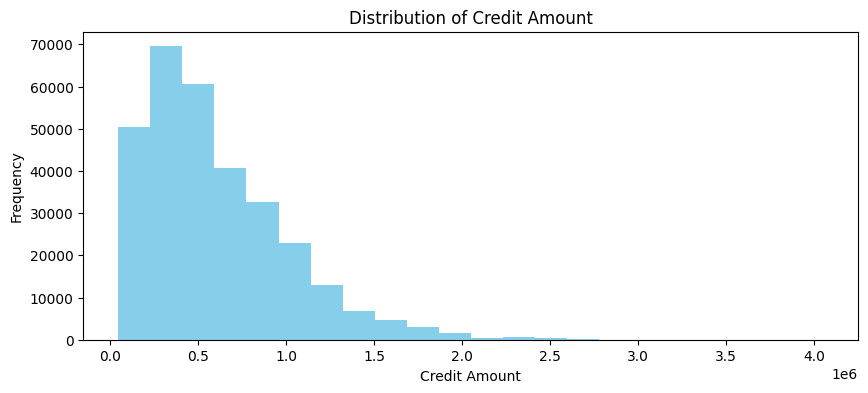

In [129]:
# to check distribution of credit loan amount 
plt.figure(figsize = (10,4))
df['AMT_CREDIT'].plot(kind='hist',bins=22 , color = "skyblue")
plt.title('Distribution of Credit Amount')
plt.ylabel('Frequency')
plt.xlabel('Credit Amount')
plt.show()

***Insights***
- Credit loan amount given to most clients is ranging from 2.5 lakhs to 6 lakhs, very few clients have been given credit amount from 15 lakhs onwards.

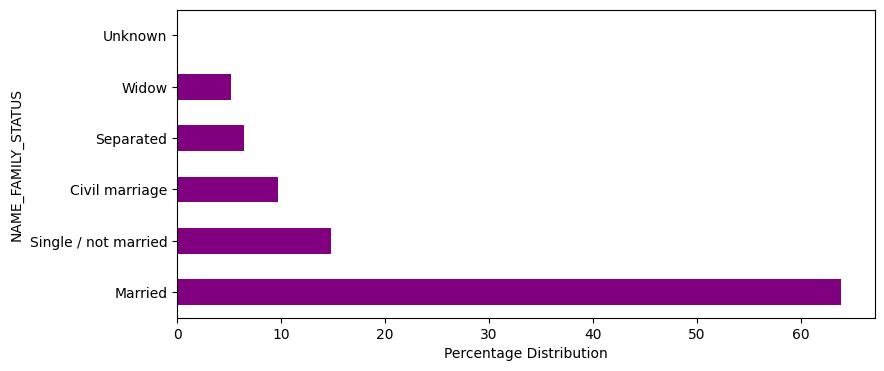

In [133]:
# percentage distribution of family status of clients in our dataset
plt.figure(figsize = (9,4))
(df.NAME_FAMILY_STATUS.value_counts(normalize = True)*100).plot.barh(color = 'purple') 
plt.xlabel('Percentage Distribution')
plt.show()

***Insights***
- Above 60% clients in our dataset are married, around 15% are single, 10% are having civil marriage and then below that are separated and widow.

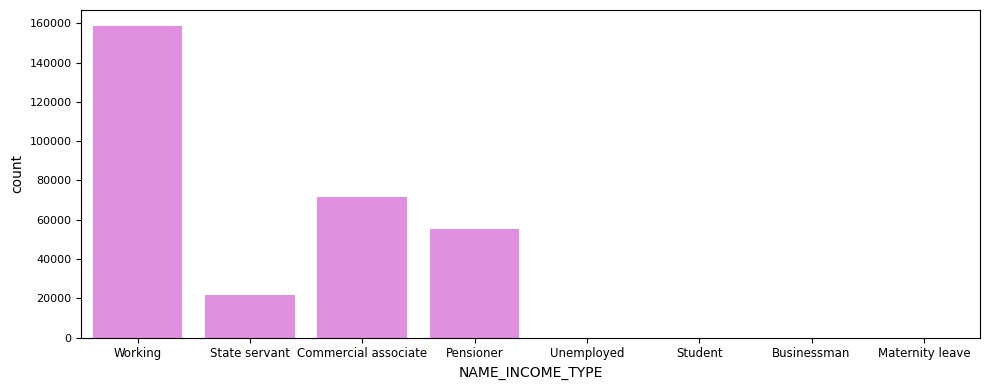

In [132]:
# data to show type of income source for clients 
plt.figure(figsize = (10,4))
sns.countplot(x=df["NAME_INCOME_TYPE"] ,color = 'violet')
plt.xticks(fontsize = 8.5)
plt.yticks(fontsize = 8)
plt.tight_layout()   #prevent overlapping to make everything fit nicely
plt.show()

***Insights***
-  Around 1.6L clients have 'Working' background, above 70 thousand have 'Commercial associate' background, 60K clients in our dataset are 'Pensioners', there are also our 20K from 'State servant' background.

In [64]:
# store all the flag document variables in one place
flag_document_columns = [col for col in df.columns if col.startswith("FLAG_DOCUMENT")]
df[flag_document_columns] = df[flag_document_columns].replace({0: 'NO', 1: 'YES'}) 
print(len(flag_document_columns))

20


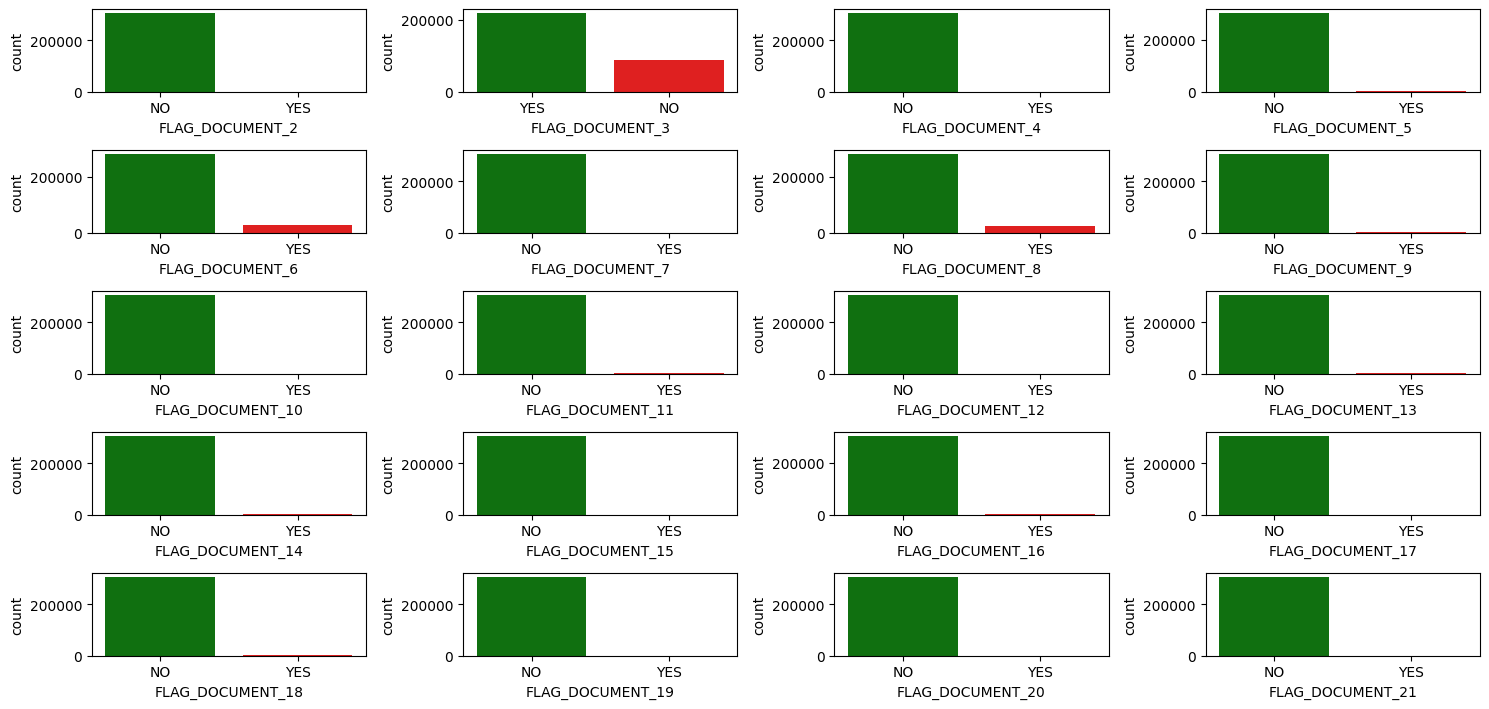

In [136]:
# Create subplots to check across all the flag document provided by client
fig, axes = plt.subplots(nrows = 5 , ncols = 4, figsize=(15, 10))
axes = axes.flatten()     # Flatten the axes array for easy iteration

# Iterate over flag document columns
for i, col in enumerate(flag_document_columns):
    sns.countplot(x=col,data=df, ax=axes[i] ,palette=["g", "r"] )
    
plt.tight_layout()    #prevent overlapping to make everything fit nicely
plt.show()

***Insights***
- Out of the total 21 documents, maximum clients have only provided document 3, 6 and 8. Very few of them have provided document 5, 9, 11, 13, 14, 16 and 18.

### Segmented univariate analysis

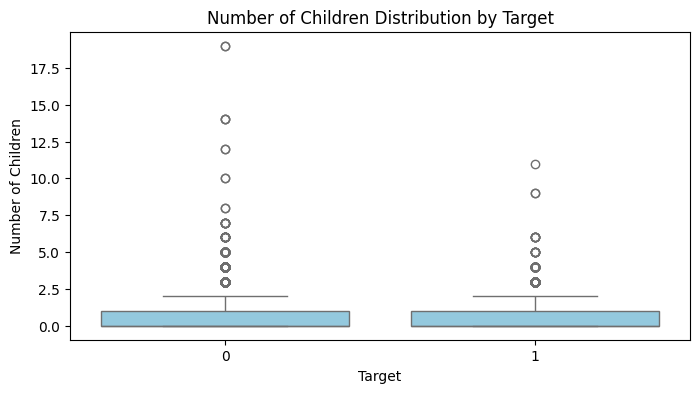

In [137]:
# Number of Children Distribution by Target
plt.figure(figsize=(8, 4))
sns.boxplot(x='TARGET', y='CNT_CHILDREN', data=df , color = 'skyblue')
plt.title('Number of Children Distribution by Target')
plt.xlabel('Target')
plt.ylabel('Number of Children')
plt.show()

***Insights***
-  For both types of clients, i.e., defaulters(Target==1) and non-defaulters(TARGET==0), we can observe that 75% of clients of our dataset are having atmost 1 child. However, there are some outliers with larger numbers of children, reaching a maximum of 19 children for non-defaulters and 11 children for defaulters. 

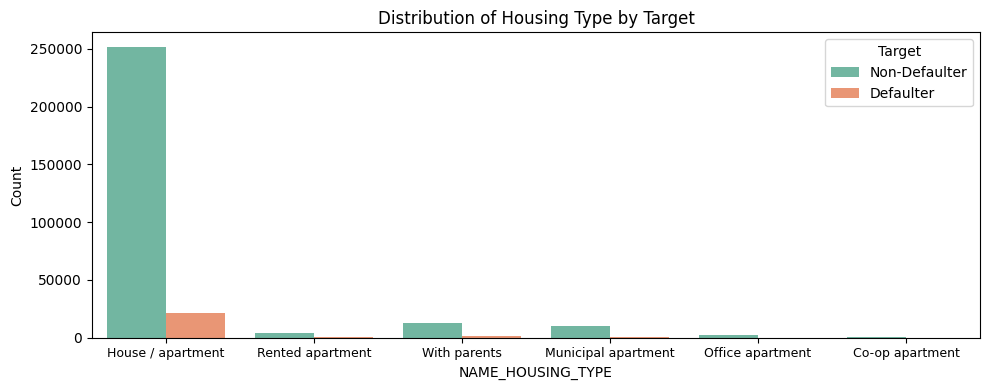

In [67]:
# housing type of clients for each target segment
plt.figure(figsize=(10, 4))
sns.countplot(x='NAME_HOUSING_TYPE', hue='TARGET', data=df ,palette='Set2' )
plt.title('Distribution of Housing Type by Target')
plt.ylabel('Count')
plt.xticks(fontsize = 9)
plt.legend(title='Target', labels=['Non-Defaulter', 'Defaulter'])
plt.tight_layout()
plt.show()

***Insights***
-  Most non-defaulters are the ones with own house/apartment, which is also the case for defaulters, compared to other housing situations. Other than House/apartment type, living with parents or in a municipal apartment is more common among non-defaulters compared to defaulters. Overall for each housing situation, clients with payment difficulties are less compared to one who pay on time.

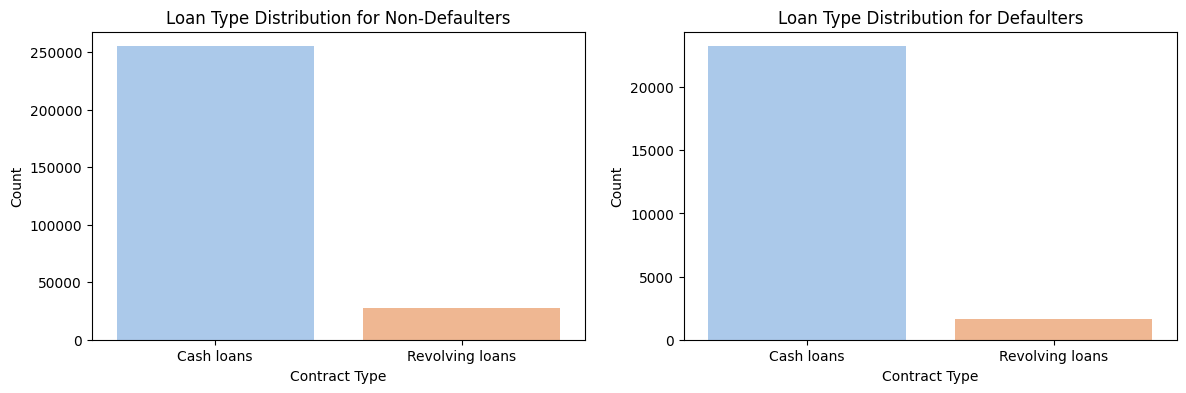

In [68]:
# type of loan across target variable
plt.figure(figsize=(14, 4))

# Subplot for df_0
plt.subplot(1, 2, 1)
sns.countplot(x='NAME_CONTRACT_TYPE', data=df_0, palette='pastel')
plt.title('Loan Type Distribution for Non-Defaulters')
plt.xlabel('Contract Type')
plt.ylabel('Count')


# Subplot for df_1
plt.subplot(1, 2, 2)
sns.countplot(x='NAME_CONTRACT_TYPE', data=df_1, palette='pastel')
plt.title('Loan Type Distribution for Defaulters')
plt.xlabel('Contract Type')
plt.ylabel('Count')

plt.show()

***Insights***
-  The majority of loans are Cash loans in both categories (TARGET = 0 and TARGET = 1).The proportion of Cash loans is higher in the category with TARGET = 0, i.e non-defaulter, compared to the category with TARGET = 1(clients with payment difficulties).
-  Both defaulters and non-defaulters show a preference for cash loans over revolving loans.

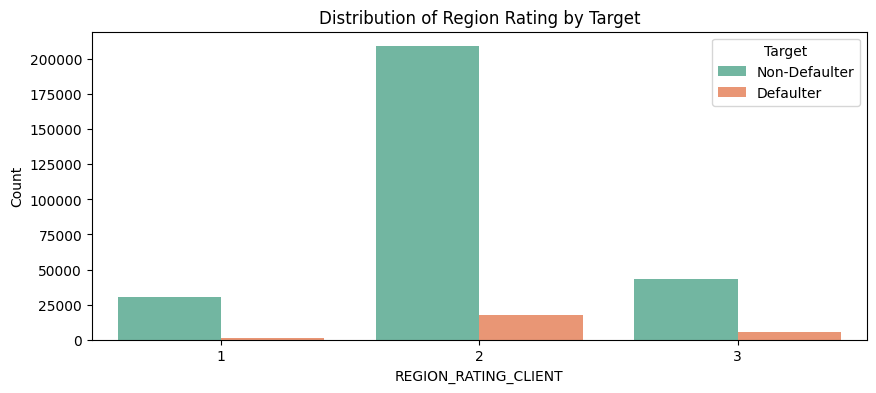

In [69]:
# count distribution of region rated 1,2,3 w.r.t Target variable
plt.figure(figsize=(10, 4))
sns.countplot(x='REGION_RATING_CLIENT', hue='TARGET', data=df , palette='Set2')
plt.title('Distribution of Region Rating by Target')
plt.ylabel('Count')

plt.legend(title='Target', labels=['Non-Defaulter', 'Defaulter'])
plt.show()

***Insights***
-  The majority of entries in the dataset are from Region, which has a rating of 2 for both defaulters and non-defaulters.
-  Despite having fewer data entries, Region, with a rating of 1, demonstrates a more positive non-default behavior, same with region with rating 3.

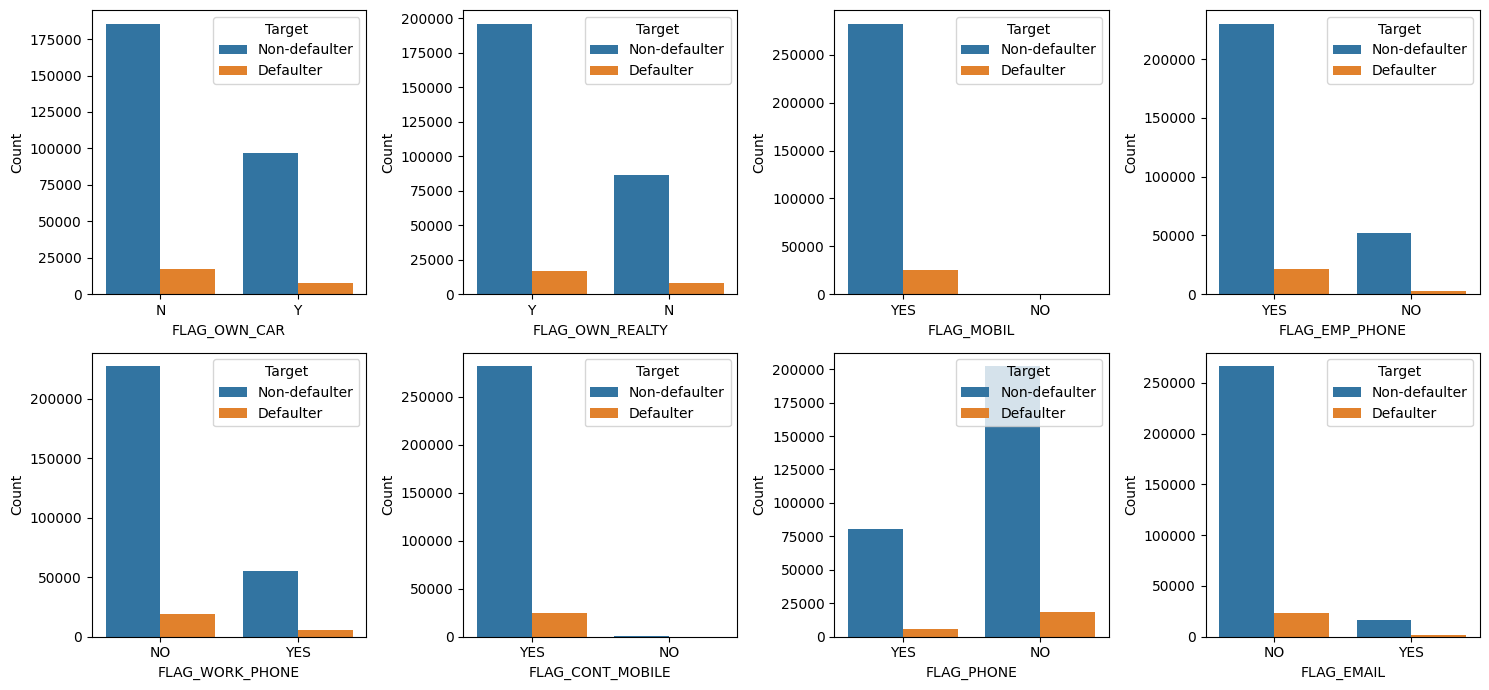

In [138]:
# check for all the personal info provided by the client w.r.t target variable
flag_personal_info = ['FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL']
df[flag_personal_info] = df[flag_personal_info].replace({0: 'NO', 1: 'YES'}) 
# since there are total of 8 flag varibale 
num_rows = 2  
num_cols = 4

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 8))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over flag columns
for i, col in enumerate(flag_personal_info):
    # Plot bar plot for the current flag column
    sns.countplot(x=col, hue='TARGET', data=df, ax=axes[i])
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].legend(title='Target', labels=['Non-defaulter', 'Defaulter'])


# Adjust layout
plt.tight_layout()
plt.show()

***Insights***
- Be it defaulter or non-defaulter, all have provided mobile phone(FLAG_MOBIL) and it was reachable(FLAG_CONT_MOBILE)
- Defaulter count seems higher for those who own realy, than those who don't. Whereas it is opposite for the ones who own a car, defaulters counts is greater for those who dont own a car than the ones who do.
- very few of the clients have provided email and home phone.

In [71]:
df.groupby(['Age_buckets'])['TARGET'].count()

Age_buckets
<20          0
20-30    45186
30-40    82348
40-50    76581
50-60    68109
60+      35286
Name: TARGET, dtype: int64

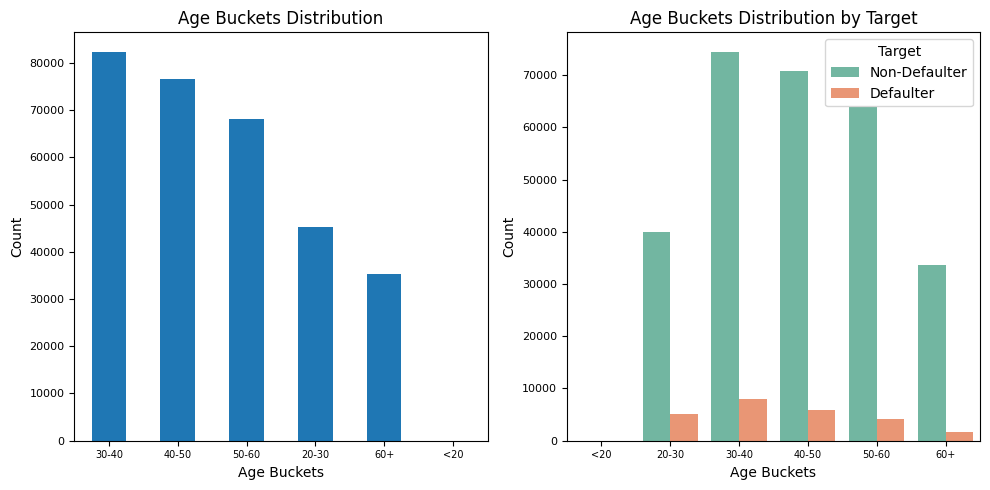

In [72]:
plt.figure(figsize=(10, 5))  # Set the figure size to (10, 6)

plt.subplot(1, 2, 1)
df['Age_buckets'].value_counts().plot.bar()
plt.title('Age Buckets Distribution')
plt.xlabel('Age Buckets')
plt.ylabel('Count')
plt.yticks(fontsize=8)
plt.xticks(fontsize=7,rotation =0)

plt.subplot(1, 2, 2)
sns.countplot(x='Age_buckets', hue='TARGET', data=df,  palette='Set2')
plt.title('Age Buckets Distribution by Target')
plt.xlabel('Age Buckets')
plt.ylabel('Count')
plt.yticks(fontsize=8)
plt.xticks(fontsize=7)
plt.legend(title='Target', labels=['Non-Defaulter', 'Defaulter'])
plt.tight_layout() 
plt.show()

***Insights***
-  Despite the smaller representation of clients aged 20 to 30 in our dataset compared to those aged 50 to 60, the former exhibit a higher rate of defaulters. This suggests that individuals in the 20-30 age group are more likely to default on loans compared to those in the 50-60 age group, despite their lower numerical presence.

### Bivariate Analysis

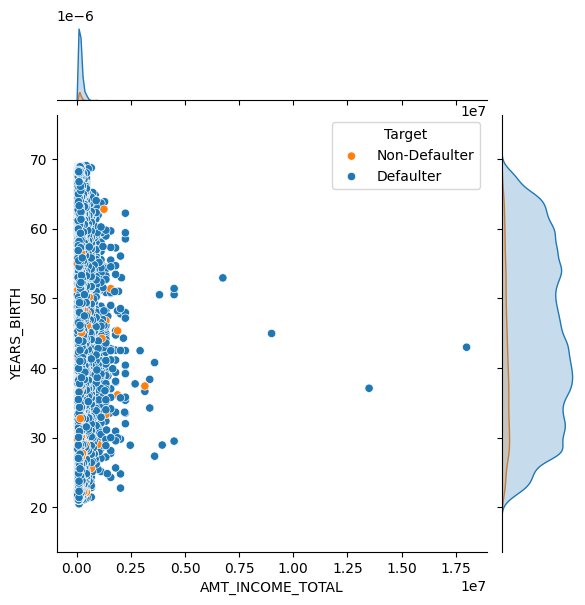

In [73]:
# Relation between income and age w.r.t Target segments
sns.jointplot(data=df, x="AMT_INCOME_TOTAL", y="YEARS_BIRTH", hue="TARGET")
plt.legend(title='Target', labels=['Non-Defaulter', 'Defaulter'])
plt.show()

***Insights***
-  Defaulter rate looks just a little bit greater for clients aged between 25 to 40, compared to the ones who are above 55.
-  Most clients without payment difficulties (TARGET=0) are clustered at the lower end of the income scale. Those with payment difficulties (TARGET=1) are scattered across the plot, but generally have lower incomes as well.

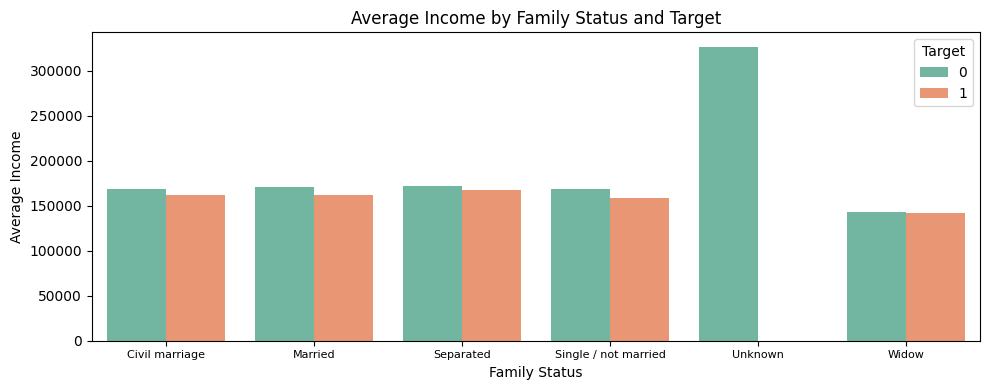

In [74]:
# Group by family status and target variable, calculate the mean income
mean_income_by_family_status = df.groupby(['NAME_FAMILY_STATUS', 'TARGET'])['AMT_INCOME_TOTAL'].mean().reset_index()  # use of reset_index() to convert the grouped DataFrame back to a flat DataFrame structure before plotting

# Plotting the average income for each family status, segmented by the TARGET variable
plt.figure(figsize=(10, 4))
sns.barplot(x='NAME_FAMILY_STATUS', y='AMT_INCOME_TOTAL', hue='TARGET', data=mean_income_by_family_status , palette='Set2')
plt.title('Average Income by Family Status and Target')
plt.xlabel('Family Status')
plt.ylabel('Average Income')
plt.xticks(rotation=0, fontsize = 8)
plt.legend(title='Target')
plt.tight_layout()
plt.show()

***Insights***
-  Across all family statuses, individuals without payment difficulties(TARGET = 0) tend to have higher average incomes than those with payment difficulties(TARGET = 1), although the difference is very small.
-  The difference in average income between those with and without payment difficulties is smallest among Widowed individuals, they also have the lowest average incomes.
-  Clients under 'Unknown' category don't seem to have any defaulters and they have highest average income.

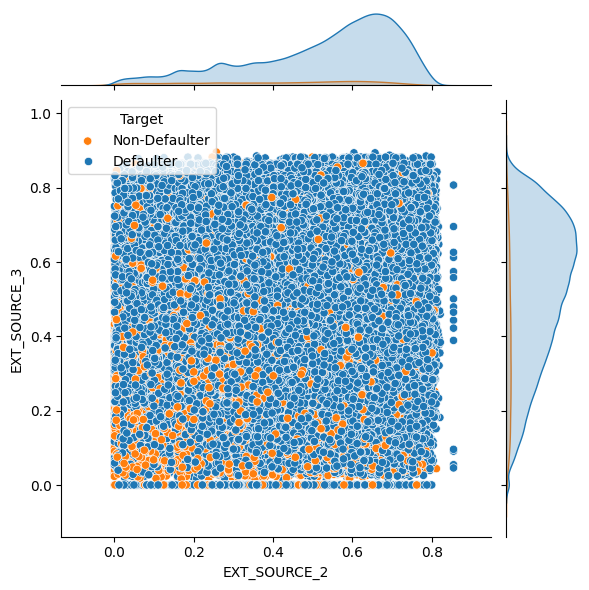

In [75]:
# finding relation between the normalized scores from different external data sources
sns.jointplot(data=df, x="EXT_SOURCE_2", y="EXT_SOURCE_3", hue="TARGET")
plt.legend(title='Target', labels=['Non-Defaulter', 'Defaulter'])
plt.show()

***Insights***
-  Across both sources cluster of orange data points at the bottom left corner, shows that payment with difficulties(TARGET=1) is more with clients whose score is ranging from 0 to 0.3

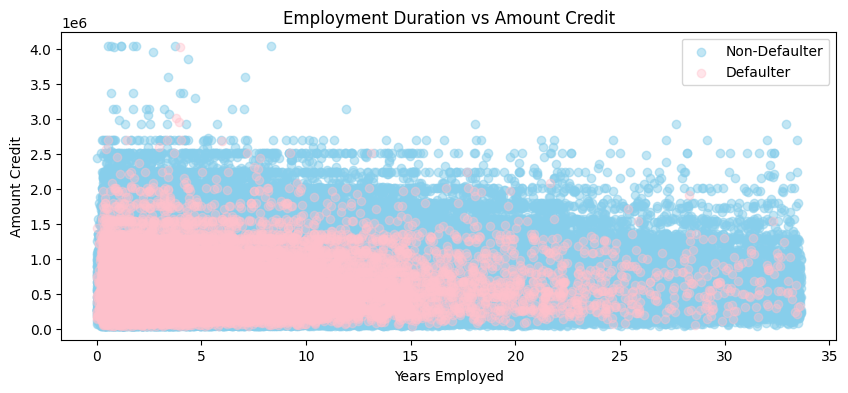

In [76]:
# get employment duration vs credit for a limited employemnt duration for better analysis
percentile_threshold = df['YEARS_EMPLOYED'].quantile(0.815)  # set a threshold limit 

# Filter the DataFrame to retain values below or equal to the threshold
employment_years_0 = df_0[df_0['YEARS_EMPLOYED'] <= percentile_threshold]
employment_years_1 = df_1[df_1['YEARS_EMPLOYED'] <= percentile_threshold]


# Scatter plot for Employment Duration vs Amount Credit
plt.figure(figsize=(10, 4))
plt.scatter(employment_years_0['YEARS_EMPLOYED'], employment_years_0['AMT_CREDIT'], alpha=0.5, label='Non-Defaulter', color='skyblue')

plt.scatter(employment_years_1['YEARS_EMPLOYED'], employment_years_1['AMT_CREDIT'], alpha=0.4, label='Defaulter', color='pink')

# Set labels and title
plt.title('Employment Duration vs Amount Credit')
plt.xlabel('Years Employed')
plt.ylabel('Amount Credit')

# Add legend
plt.legend()

# Show plot
plt.show()

***Insights***
-  Defaulters count are less compared to non-defaulters for employment years above 20 and even lesser for employment above 30
-  defaulters are also less frequent compared to non-defaulters for early employment years but for higher credit amounts.

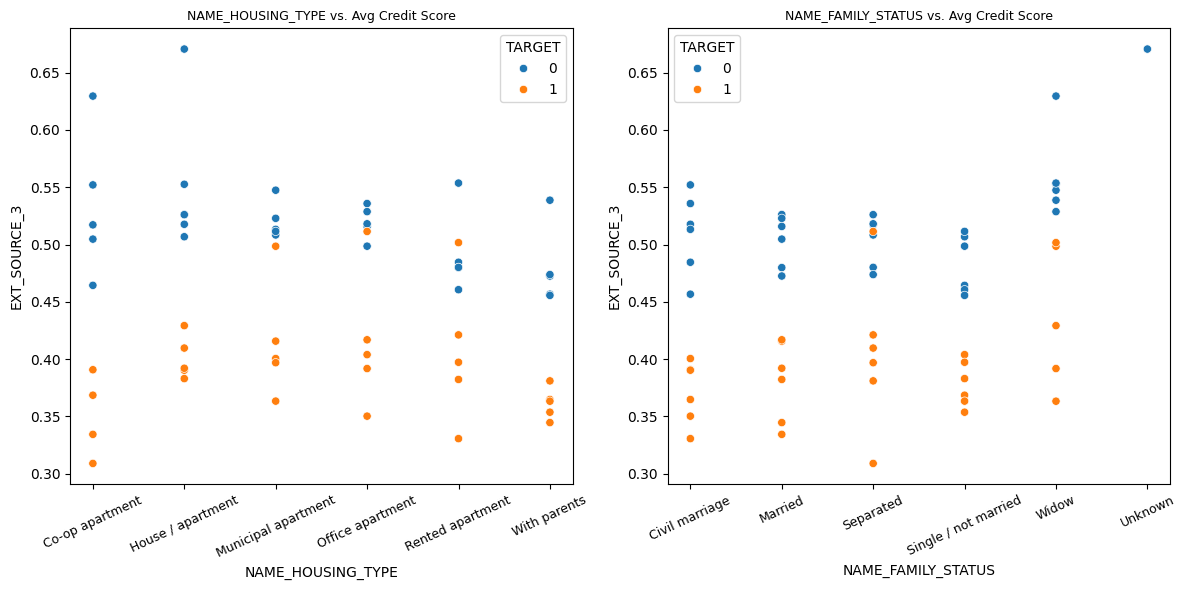

In [77]:
grouped_data = df.groupby(['NAME_HOUSING_TYPE','NAME_FAMILY_STATUS','TARGET'])['EXT_SOURCE_3'].mean().reset_index()

# Define categorical features (excluding target)
categorical_features = ['NAME_HOUSING_TYPE', 'NAME_FAMILY_STATUS']

# Create a figure for subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # Adjust the figure size as needed

# Iterate through categorical features
for i, feature in enumerate(categorical_features):
    
    # Create scatter plot for each feature
    sns.scatterplot(x=feature, y='EXT_SOURCE_3', hue='TARGET', data=grouped_data, ax=axes[i])

    # Add title and labels
    axes[i].set_title(f"{feature} vs. Avg Credit Score" , fontsize =9)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("EXT_SOURCE_3")
    axes[i].tick_params(axis='x', rotation=25 ,labelsize =9 )

plt.tight_layout()
plt.show()

***Insights***
-  Non-defaulters (TARGET = 0) tend to have a higher average credit score(EXT_SOURCE_3) compared to defaulters (TARGET = 1) across most housing types and family statuses
-  Above the average credit score of 0.45, be it client's housing type or their family status, most seem to have no payment difficulties.

### Multivariate Analysis

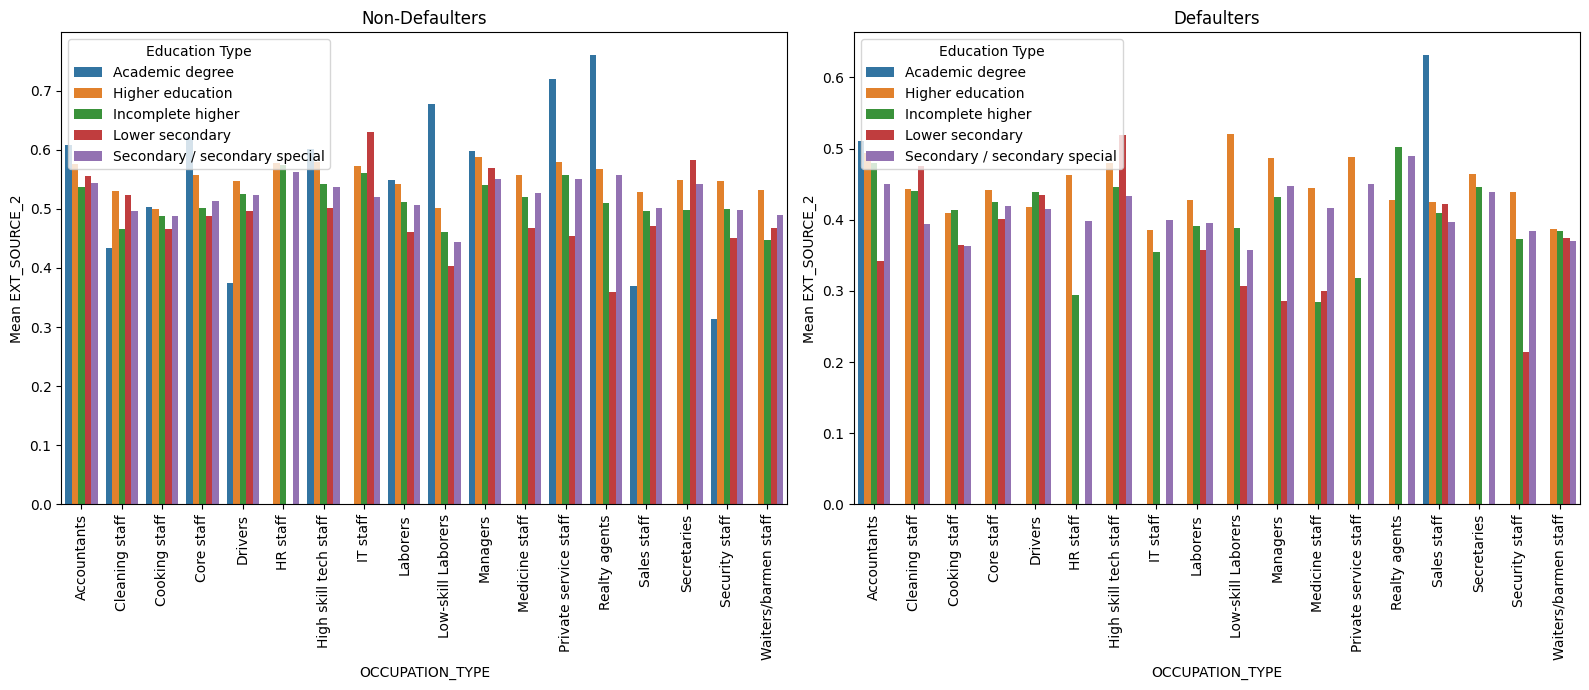

In [78]:
# Create grouped data for non-defaulters and defaulters
grouped_data_0 = df_0.groupby(['OCCUPATION_TYPE', 'NAME_EDUCATION_TYPE'])['EXT_SOURCE_2'].mean().reset_index() # use of reset_index() to convert the grouped DataFrame back to a flat DataFrame structure before plotting
grouped_data_1 = df_1.groupby(['OCCUPATION_TYPE', 'NAME_EDUCATION_TYPE'])['EXT_SOURCE_2'].mean().reset_index()

# Create subplots with shared x-axis
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 7))

# Plot for non-defaulters
sns.barplot(data=grouped_data_0, x='OCCUPATION_TYPE', y='EXT_SOURCE_2', hue='NAME_EDUCATION_TYPE', ax=axes[0])
axes[0].set_title('Non-Defaulters')
axes[0].set_ylabel('Mean EXT_SOURCE_2')
axes[0].legend(title='Education Type', loc='upper left')
axes[0].tick_params(axis='x', rotation=90)

# Plot for defaulters
sns.barplot(data=grouped_data_1, x='OCCUPATION_TYPE', y='EXT_SOURCE_2', hue='NAME_EDUCATION_TYPE', ax=axes[1])
axes[1].set_title('Defaulters')
axes[1].set_ylabel('Mean EXT_SOURCE_2')
axes[1].legend(title='Education Type', loc='upper left')
axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

***Insights:***
-  Academic Degree seems to be missing from most of the occupations in defaulters plot.
-  For the non-defaulters plot, in most occupations, individuals with an Academic Degree tend to have a higher average EXT_SOURCE_2 compared to those with lower education levels.
-  Sales staff: In non-defaulters plot, those with an Academic Degree have a lower average EXT_SOURCE_2 compared to other education levels. However, it looks opposite in the defaulters plot.

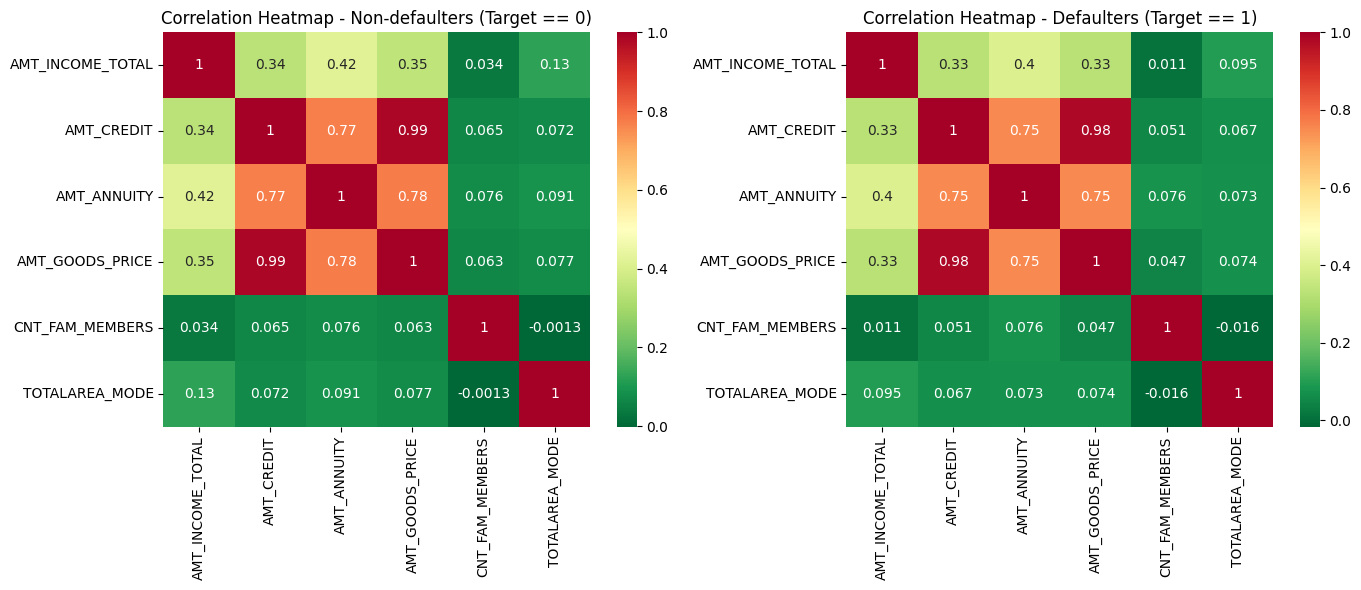

In [79]:
# correlation between few of the numerical variables w.r.t target variable

num_variables = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE','CNT_FAM_MEMBERS','TOTALAREA_MODE']

plt.figure(figsize=(14, 6))

# Heatmap for non-defaulters (df_0)
plt.subplot(1, 2, 1)
sns.heatmap(df_0[num_variables].corr(), annot=True, cmap="RdYlGn_r")
plt.title('Correlation Heatmap - Non-defaulters (Target == 0)')

# Heatmap for defaulters (df_1)
plt.subplot(1, 2, 2)
sns.heatmap(df_1[num_variables].corr(), annot=True, cmap="RdYlGn_r")
plt.title('Correlation Heatmap - Defaulters (Target == 1)')

plt.tight_layout()
plt.show()

***Insights***
-  There is a strong positive correlation between AMT_CREDIT and AMT_GOODS_PRICE, as indicated by the dark green color in both heatmaps.
-  AMT_ANNUITY also shows a significant positive correlation with both AMT_CREDIT and AMT_GOODS_PRICE
-  CNT_FAM_MEMBERS shows a weaker correlation with other variables, implying that number of family members have no relationship with these financial attributes.
-  For non-defaulters, there’s a noticeable positive correlation between AMT_INCOME_TOTAL and other monetary attributes like AMT_CREDIT, but this correlation is less pronounced for defaulters.
-  Non-defaulters show a very weak positive correlation between income and property size. 

---------------------------------------------------------------------------------------------

## Previous Application Data Loading

In [80]:
pre_df = pd.read_csv("previous_application.csv")

### Data Understanding

#### Checking the structure of the dataframe

In [81]:
# reading dataset
pre_df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
# checking the last 3 rows
pre_df.tail(3)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,10525.5,105237.0,MONDAY,12,Y,1,0.101401,NaN,NaN,XAP,Approved,-1488,Cash through the bank,XAP,"Spouse, partner",Repeater,Consumer Electronics,POS,XNA,Country-wide,1370,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,-1457.0,-1187.0,-1187.0,-1181.0,0.0
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,NaN,180000.0,WEDNESDAY,9,Y,1,NaN,NaN,NaN,XNA,Approved,-1185,Cash through the bank,XAP,Family,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),-1,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-1155.0,-825.0,-825.0,-817.0,1.0
1670213,2418762,261212,Cash loans,16431.300,360000.0,360000.0,NaN,360000.0,SUNDAY,10,Y,1,NaN,NaN,NaN,XNA,Approved,-1193,Cash through the bank,XAP,Family,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),-1,XNA,48.0,middle,Cash X-Sell: middle,365243.0,-1163.0,247.0,-443.0,-423.0,0.0


In [83]:
# getting the shape of the datset
pre_df.shape

(1670214, 37)

In [84]:
# concise summary of the DataFrame's structure
pre_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

***Insights***
-  Total number of entries (rows) in the DataFrame is 1,670,214 with 37 columns.
-  Many columns seem to have missing values.

In [85]:
# checking the list containing all the column names
pre_df.columns.tolist()

['SK_ID_PREV',
 'SK_ID_CURR',
 'NAME_CONTRACT_TYPE',
 'AMT_ANNUITY',
 'AMT_APPLICATION',
 'AMT_CREDIT',
 'AMT_DOWN_PAYMENT',
 'AMT_GOODS_PRICE',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'FLAG_LAST_APPL_PER_CONTRACT',
 'NFLAG_LAST_APPL_IN_DAY',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_CONTRACT_STATUS',
 'DAYS_DECISION',
 'NAME_PAYMENT_TYPE',
 'CODE_REJECT_REASON',
 'NAME_TYPE_SUITE',
 'NAME_CLIENT_TYPE',
 'NAME_GOODS_CATEGORY',
 'NAME_PORTFOLIO',
 'NAME_PRODUCT_TYPE',
 'CHANNEL_TYPE',
 'SELLERPLACE_AREA',
 'NAME_SELLER_INDUSTRY',
 'CNT_PAYMENT',
 'NAME_YIELD_GROUP',
 'PRODUCT_COMBINATION',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

In [86]:
# checking the data types of all the columns
pre_df.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_DOWN_PAYMENT               float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
RATE_DOWN_PAYMENT              float64
RATE_INTEREST_PRIMARY          float64
RATE_INTEREST_PRIVILEGED       float64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_TYPE_SUITE                 object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE             

In [87]:
# getting the descriptive statistics of the numerical columns in a DataFrame
pre_df.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [88]:
# we saw there are 65 floating-point dtype columns and 41 integer dtype columns, so just to re-check length of numerical columns used for above statistical calculations 
len(pre_df.describe().columns) 

21

***Insights***
-  Dates columns are having negative values.

### Data Cleaning and Manipulation

In [89]:
# Calculating percentage of missing values
percentage_missing_values =  (pre_df.isnull().mean()) * 100

# using pd.DataFrame() to get a well-structured tabular format
missing_values_of_previous_df = pd.DataFrame({'percentage_missing_values': percentage_missing_values})

# sorting the DataFrame by the percentage of missing values in descending order
missing_values_of_previous_df = missing_values_of_previous_df.sort_values(by='percentage_missing_values', ascending=False)

missing_values_of_previous_df

,percentage_missing_values
RATE_INTEREST_PRIVILEGED,99.643698
RATE_INTEREST_PRIMARY,99.643698
AMT_DOWN_PAYMENT,53.636480
RATE_DOWN_PAYMENT,53.636480
NAME_TYPE_SUITE,49.119754
NFLAG_INSURED_ON_APPROVAL,40.298129
DAYS_TERMINATION,40.298129
DAYS_LAST_DUE,40.298129
DAYS_LAST_DUE_1ST_VERSION,40.298129
DAYS_FIRST_DUE,40.298129


In [90]:
# total number of columns with missing values
(pre_df.isnull().sum()>0).sum()

16

In [91]:
# subsetting missing values above 54% 
missing_abv_54 = percentage_missing_values[percentage_missing_values > 54]
missing_abv_54

RATE_INTEREST_PRIMARY       99.643698
RATE_INTEREST_PRIVILEGED    99.643698
dtype: float64

In [92]:
# listing high percentage missing values, here threshold to consider is taken as 54%
drop_columns_above_54 = missing_abv_54.index.tolist()
print(drop_columns_above_54) 

['RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED']


-  Both these variables have really high missing values, so dropping these columns with high missing values can improve computational efficiency

In [93]:
# dropping high percentage missing values
pre_df.drop(drop_columns_above_54 , axis =1 , inplace =True)

In [94]:
# rechecking columns
pre_df.shape

(1670214, 35)

*"After dropping higher percentage missing values we are left with 35 columns"*

In [95]:
# rechecking which columns have missing values 
rest_missing_values = (pre_df.isnull().mean() * 100)[(pre_df.isnull().mean() * 100) > 0].sort_values(ascending=False)
rest_missing_values

AMT_DOWN_PAYMENT             53.636480
RATE_DOWN_PAYMENT            53.636480
NAME_TYPE_SUITE              49.119754
DAYS_FIRST_DRAWING           40.298129
DAYS_FIRST_DUE               40.298129
DAYS_LAST_DUE_1ST_VERSION    40.298129
DAYS_LAST_DUE                40.298129
DAYS_TERMINATION             40.298129
NFLAG_INSURED_ON_APPROVAL    40.298129
AMT_GOODS_PRICE              23.081773
AMT_ANNUITY                  22.286665
CNT_PAYMENT                  22.286366
PRODUCT_COMBINATION           0.020716
AMT_CREDIT                    0.000060
dtype: float64

In [96]:
len(rest_missing_values)

14

***Insights***
- 14 columns are having missing value. 
- Can impute mode for NAME_TYPE_SUITE, NFLAG_INSURED_ON_APPROVAL, PRODUCT_COMBINATION since they come under Categorical variables.
-  Rest columns are Numerical variables, imputing with mean or median will depend upon the distribution of the data and the presence of outliers.

In [97]:
# check for below 13% missing values
print(rest_missing_values[rest_missing_values <= 13])

PRODUCT_COMBINATION    0.020716
AMT_CREDIT             0.000060
dtype: float64


***Inisghts***
-  PRODUCT_COMBINATION and AMT_CREDIT variables have less percentage of missing value, but dropping these columns might cause loss of valuable data, best to leave it as it is. 

### Data Types Verification

In [98]:
pre_df.info(verbose=True)  # verbose=True parameter to display more detailed output

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 35 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

### Ensuring Data Format Integrity

In [99]:
# check data for columns with days to see if they are in improper format 
pre_df[['DAYS_FIRST_DRAWING','DAYS_FIRST_DUE','DAYS_LAST_DUE_1ST_VERSION','DAYS_LAST_DUE','DAYS_TERMINATION','DAYS_DECISION']].head()

,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,DAYS_DECISION
0,365243.0,-42.0,300.0,-42.0,-37.0,-73
1,365243.0,-134.0,916.0,365243.0,365243.0,-164
2,365243.0,-271.0,59.0,365243.0,365243.0,-301
3,365243.0,-482.0,-152.0,-182.0,-177.0,-512
4,NaN,NaN,NaN,NaN,NaN,-781


In [100]:
# recheck with DAYS_FIRST_DRAWING column:
pre_df['DAYS_FIRST_DRAWING'].unique()

array([ 3.65243e+05,          nan, -2.77000e+02, ..., -1.61100e+03,
       -1.77000e+03, -1.87900e+03])

In [101]:
# change the negative days value to positive or absolute values
columns_to_absolute = ['DAYS_FIRST_DRAWING','DAYS_FIRST_DUE','DAYS_LAST_DUE_1ST_VERSION','DAYS_LAST_DUE','DAYS_TERMINATION','DAYS_DECISION']

for column in columns_to_absolute:
    pre_df[column] = pre_df[column].abs()

In [102]:
# check if now in proper format
pre_df[['DAYS_FIRST_DRAWING','DAYS_FIRST_DUE','DAYS_LAST_DUE_1ST_VERSION','DAYS_LAST_DUE','DAYS_TERMINATION','DAYS_DECISION']].head()

,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,DAYS_DECISION
0,365243.0,42.0,300.0,42.0,37.0,73
1,365243.0,134.0,916.0,365243.0,365243.0,164
2,365243.0,271.0,59.0,365243.0,365243.0,301
3,365243.0,482.0,152.0,182.0,177.0,512
4,NaN,NaN,NaN,NaN,NaN,781


### Identifying Outliers

In [103]:
numerical_columns = ['AMT_ANNUITY', 'AMT_APPLICATION','AMT_CREDIT', 'AMT_GOODS_PRICE', 'HOUR_APPR_PROCESS_START', 
                     'NFLAG_LAST_APPL_IN_DAY', 'DAYS_DECISION', 'SELLERPLACE_AREA','CNT_PAYMENT', 'DAYS_FIRST_DRAWING', 
                     'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL']

In [104]:
# check number of outliers for the numerical_columns list
whisker_length = 1.5 

outlier_counts = { }    # create a empty dictionary                       

for column in numerical_columns:                       
    q1 = pre_df[column].quantile(0.25)                   
    q3 = pre_df[column].quantile(0.75)            
    IQR = q3 - q1                              
    lower_bound = q1 - whisker_length * IQR        
    upper_bound = q3 + whisker_length * IQR          

    outliers_above_upper_bound = pre_df[pre_df[column] > upper_bound].shape[0]            
    outlier_counts[column] = outliers_above_upper_bound                   

print(outlier_counts) 

{'AMT_ANNUITY': 82762, 'AMT_APPLICATION': 208019, 'AMT_CREDIT': 179989, 'AMT_GOODS_PRICE': 145715, 'HOUR_APPR_PROCESS_START': 202, 'NFLAG_LAST_APPL_IN_DAY': 0, 'DAYS_DECISION': 17571, 'SELLERPLACE_AREA': 268087, 'CNT_PAYMENT': 55903, 'DAYS_FIRST_DRAWING': 0, 'DAYS_FIRST_DUE': 40645, 'DAYS_LAST_DUE_1ST_VERSION': 93864, 'DAYS_LAST_DUE': 211221, 'DAYS_TERMINATION': 225913, 'NFLAG_INSURED_ON_APPROVAL': 0}


In [105]:
# to plot variables having maximum outliers
outliers_to_plot = {key: value for key, value in outlier_counts.items() if value > 0}
print(len(outliers_to_plot))

12


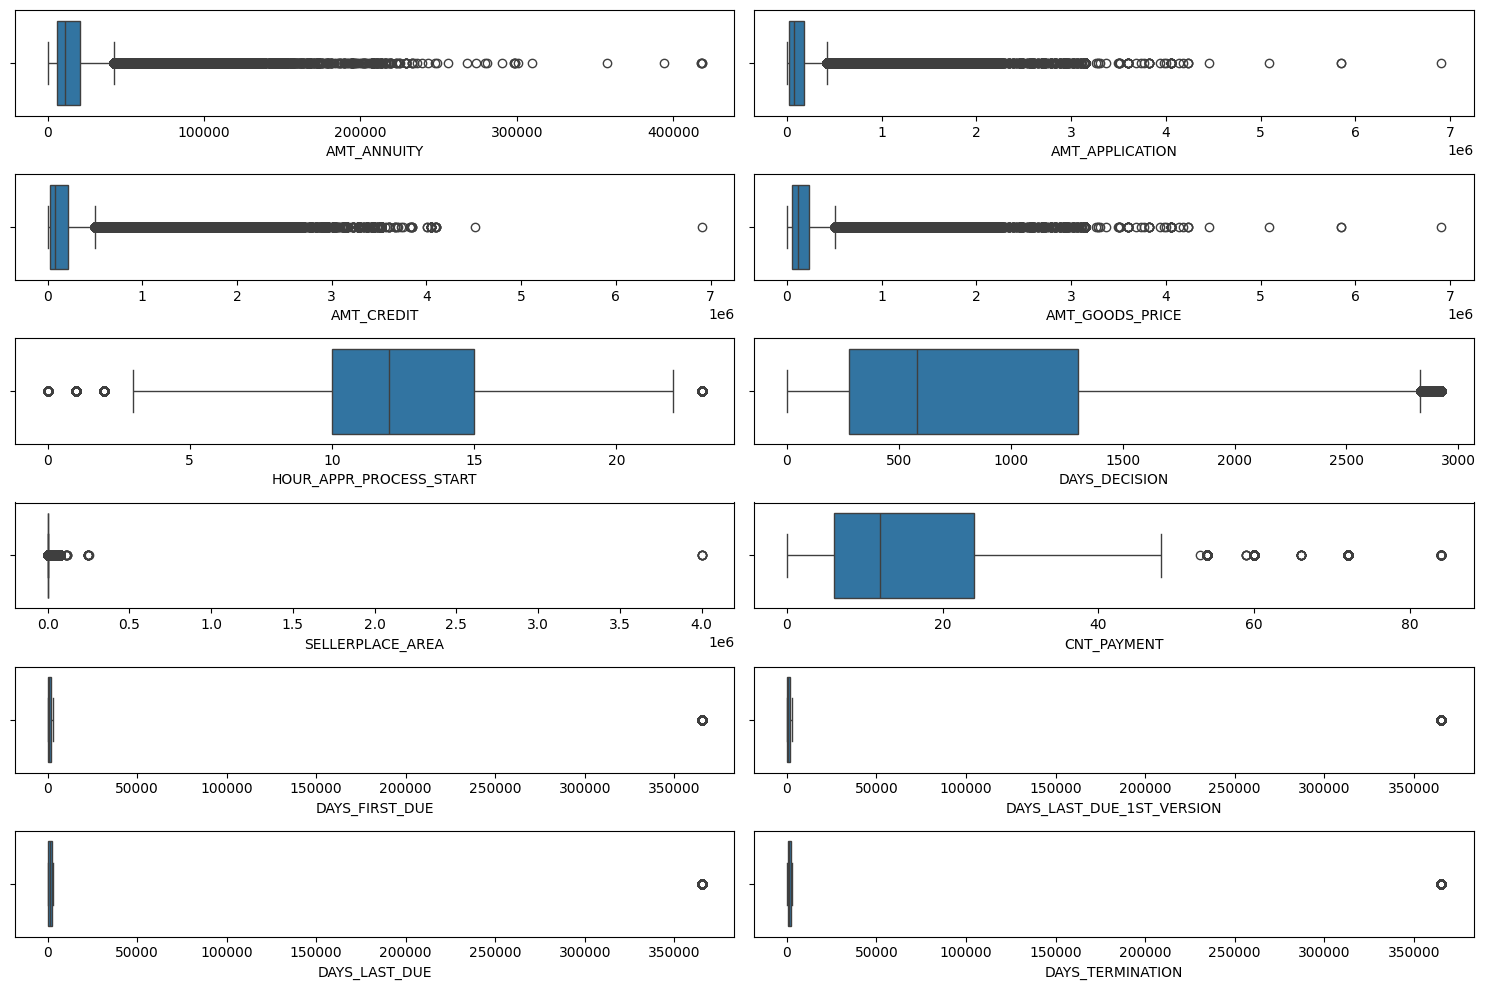

In [106]:
# Set up the subplot grid
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(15, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each numerical column and create a boxplot
for i, col in enumerate(outliers_to_plot):
    sns.boxplot(x=pre_df[col], ax=axes[i])

# Adjust layout
plt.tight_layout()
plt.show()

***Insights***
-  Presence of extreme outliers data point in SELLERPLACE_AREA variable might be due to larger selling area. 
-  Presence of extreme outliers in DAYS_FIRST_DUE , DAYS_LAST_DUE_1ST_VERSION , DAYS_LAST_DUE, DAYS_TERMINATION variables indicates that there might be error in the data, since data points above 350000 days means approximately 950 years which is illogical.
-  For rest of the variables such as AMT_ANNUITY, 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE', we can observe significant number of outliers, which can indicate various aspects such as high-income borrowers, amount applied based on the purpose of the loan, loans for extremely valuable items.
-  In CNT_PAYMENT variable, presence of outliers is plausible, people can have a long credit duration for repayment. 

### Univariate Analysis

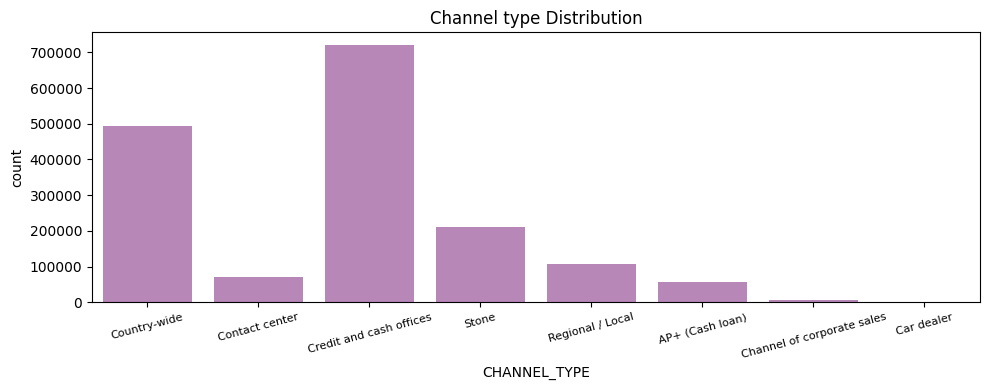

In [107]:
# count of clients in our dataset came from which channel to apply for loan
plt.figure(figsize = (10,4))
sns.countplot(x=pre_df["CHANNEL_TYPE"] , color = 'purple',  alpha=0.5 )
plt.title('Channel type Distribution')
plt.xticks(rotation = 15, fontsize=8)
plt.tight_layout()
plt.show()

***Insights***
-  Maximum number of clients, which is almost 700K customers, applied through "credit and cash offices", and very few, around 450 applied for loan through "car dealer".

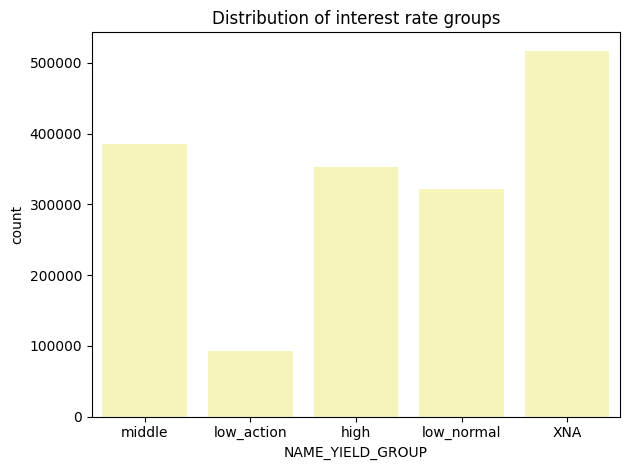

In [108]:
# Grouped interest rate of the previous application
sns.countplot(x=pre_df["NAME_YIELD_GROUP"] , color = 'yellow',  alpha=0.3)
plt.title('Distribution of interest rate groups')
plt.tight_layout()
plt.show()

***Insights:***
-  Apart from XNA which probably are representing missing values or unknown data, moderate interest rates (Middle) are the highest and most preferred among clients, depending on the credit amount, and least preferred are the low_action category.

### Bivariate Analysis

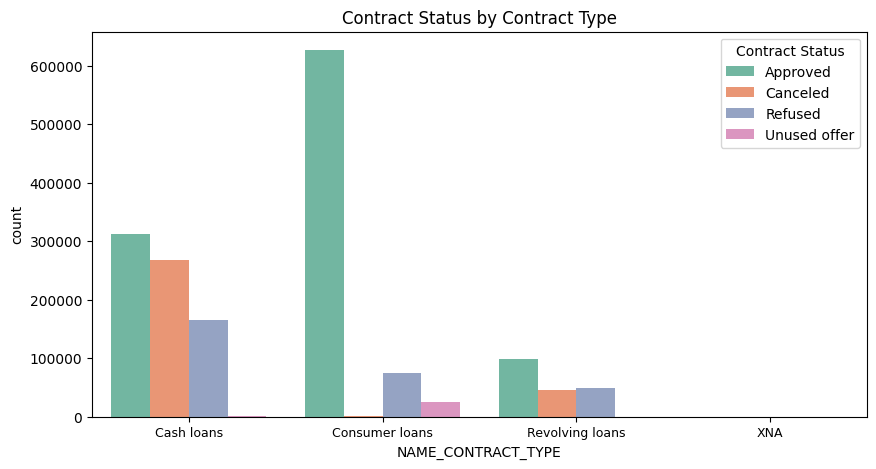

In [109]:
# Group the data and count occurrences of each contract status within each contract type
contract_status_counts = pre_df.groupby(['NAME_CONTRACT_TYPE', 'NAME_CONTRACT_STATUS']).size().reset_index(name='count')  # name=count is to specify the name of the column that will contain the counts of occurrences for each unique combination

# Plot the bar plot
plt.figure(figsize=(10, 5))
sns.barplot(data=contract_status_counts, x='NAME_CONTRACT_TYPE', y='count', hue='NAME_CONTRACT_STATUS' ,  palette='Set2')
plt.title('Contract Status by Contract Type')
plt.xticks(fontsize = 9)
plt.legend(title='Contract Status')
plt.show()

***Insights:***
-  Consumer loans have the highest approval count, whereas Cash loans have a moderate approval rate and Revolving loans have the lowest approval count.
-  Cash loans have the highest cancellation count, Revolving loans have a moderate cancellation count and Consumer loans have a very low cancellation count.
-  Revolving loans have the highest refusal rate, then are Consumer loans and least are the Revolving loans.

In [110]:
pre_df.groupby(['NAME_CONTRACT_TYPE','NAME_CONTRACT_STATUS'])['NAME_CONTRACT_STATUS'].count()

NAME_CONTRACT_TYPE  NAME_CONTRACT_STATUS
Cash loans          Approved                312540
                    Canceled                268591
                    Refused                 165928
                    Unused offer               494
Consumer loans      Approved                626470
                    Canceled                  1559
                    Refused                  75185
                    Unused offer             25937
Revolving loans     Approved                 97771
                    Canceled                 45854
                    Refused                  49534
                    Unused offer                 5
XNA                 Canceled                   315
                    Refused                     31
Name: NAME_CONTRACT_STATUS, dtype: int64

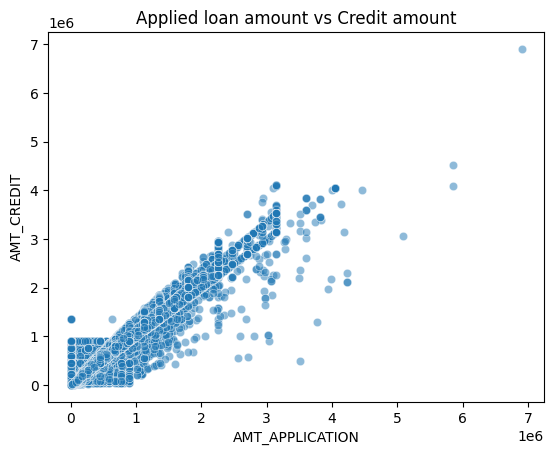

In [111]:
# Create scatter plot to find relationship between applied loan amount and credit amount in the previous application
sns.scatterplot(x='AMT_APPLICATION', y='AMT_CREDIT', data=pre_df, alpha=0.5)
plt.title('Applied loan amount vs Credit amount')
plt.show()

***Insights:***
-  scatter plot shows a positive correlation between both variables, indicating a positive linear relationship, i.e. as the amount requested in the loan application increases, the credit amount approved also tends to increase.
-  However, there are some outliers, particularly at the higher end of the “AMT_APPLICATION” range.

## Merging both DataFrames

In [112]:
# merge both application_data.csv and previous_application.csv
merged_df = pd.merge(df, pre_df, on="SK_ID_CURR", how="left")

In [113]:
merged_df.shape   # check for total number of entries and columns

(1430152, 117)

In [114]:
merged_df.head()  # look at the new merge dataframe

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,YEARS_EMPLOYED,YEARS_BIRTH,Income_Bins,Age_buckets,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_y,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,3648.0,2120,YES,YES,NO,YES,YES,NO,Laborers,1,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,2.0,2.0,1134.0,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,0.0,0.0,0.0,0.0,0.0,1.0,1.744011,25.902806,200001-250000,20-30,1038818.0,Consumer loans,9251.775,179055.0,179055.0,0.0,179055.0,SATURDAY,9.0,Y,1.0,0.000000,XAP,Approved,606.0,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500.0,Auto technology,24.0,low_normal,POS other with interest,365243.0,565.0,125.0,25.0,17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,1186.0,291,YES,YES,NO,YES,YES,NO,Core staff,2,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,828.0,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,0.0,0.0,0.0,0.0,0.0,0.0,3.252567,45.900068,250001-300000,40-50,1810518.0,Cash loans,98356.995,900000.0,1035882.0,NaN,900000.0,FRIDAY,12.0,Y,1.0,NaN,XNA,Approved,746.0,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1.0,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,716.0,386.0,536.0,527.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,1186.0,291,YES,YES,NO,YES,YES,NO,Core staff,2,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,828.0,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,0.0,0.0,0.0,0.0,0.0,0.0,3.252567,45.

In [115]:
merged_df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,YEARS_EMPLOYED,YEARS_BIRTH,SK_ID_PREV,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_y,HOUR_APPR_PROCESS_START_y,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.430152e+06,1.430152e+06,1.430152e+06,1.430152e+06,1.430152e+06,1.430059e+06,1.428933e+06,1.430152e+06,1.430152e+06,1.430152e+06,1.430152e+06,1.430152e+06,1.430152e+06,1.430152e+06,1.430152e+06,1.430152e+06,1.430152e+06,1.430152e+06,1.430152e+06,1.430152e+06,1.428251e+06,1.184533e+06,739096.000000,725133.000000,739096.000000,725133.000000,739096.000000,725133.000000,746344.000000,1.426759e+06,1.426759e+06,1.426759e+06,1.426759e+06,1.430151e+06,1.264340e+06,1.264340e+06,1.264340e+06,1.264340e+06,1.264340e+06,1.264340e+06,1.430152e+06,1.430152e+06,1.413698e+06,1.106481e+06,1.413698e+06,1.413697e+06,6.641580e+05,1.094173e+06,1.413698e+06,1.413698e+06,664158.000000,1.413698e+06,1.413698e+06,1.106486e+06,852593.000000,852593.000000,852593.000000,852593.000000,852593.000000,852593.000000
mean,2.784706e+05,8.624048e-02,4.038857e-01,1.733586e+05,5.893386e+05,2.704203e+04,5.294436e+05,2.079104e-02,5.001271e+03,3.034491e+03,2.149000e+00,2.058179e+00,2.036176e+00,1.199400e+01,1.229380e-02,4.435962e-02,3.626048e-02,7.368098e-02,2.220156e-01,1.738612e-01,5.117785e-01,4.900494e-01,0.977251,0.222847,0.976523,0.219062,0.977235,0.222477,0.100210,1.541811e+00,1.536160e-01,1.523943e+00,1.077106e-01,1.076473e+03,6.225382e-03,6.877897e-03,3.827847e-02,3.000087e-01,3.585143e-01,2.883236e+00,1.986575e+02,4.466793e+01,1.922745e+06,1.583721e+04,1.752438e+05,1.963544e+05,6.655340e+03,2.264516e+05,1.247893e+01,9.964321e-01,0.080175,8.803669e+02,3.149884e+02,1.605195e+01,342389.724493,15609.240510,34669.582089,78233.014491,83861.835708,0.330573
std,1.028019e+05,2.807189e-01,7.165178e-01,1.034646e+05,3.874208e+05,1.404004e+04,3.557886e+05,1.339810e-02,3.551629e+03,1.507183e+03,9.001651e-01,4.963440e-01,4.891560e-01,3.233165e+00,1.101938e-01,2.058929e-01,1.869376e-01,2.612511e-01,4.156017e-01,3.789903e-01,1.910694e-01,1.965400e-01,0.061595,0.141400,0.067409,0.140716,0.062542,0.141898,0.104234,2.527560e+00,4.651520e-01,2.505798e+00,3.784202e-01,8.036981e+02,8.207994e-02,1.077028e-01,2.133648e-01,9.789473e-01,9.220879e-01,2.206264e+00,3.922251e+02,1.190072e+01,5.327152e+05,1.472491e+04,2.936225e+05,3.194815e+05,2.062034e+04,3.159379e+05,3.331476e+00,5.962566e-02,0.107784,7.835392e+02,7.695090e+03,1.456676e+01,88321.752612,71218.352517,105714.644665,148891.325141,152717.981728,0.470420
min,1.000020e+05,0.000000e+00,0.000000e+00,2.565000e+04,4.500000e+04,1.615500e+03,4.050000e+04,2.900000e-04,0.000000e+00,0.000000e+00,-1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.173617e-08,5.272652e-04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000

In [116]:
# subsetting target variable for future use
merged_df_target_0 = merged_df[merged_df['TARGET'] == 0]
merged_df_target_1 = merged_df[merged_df['TARGET'] == 1]

### Univariate Analysis

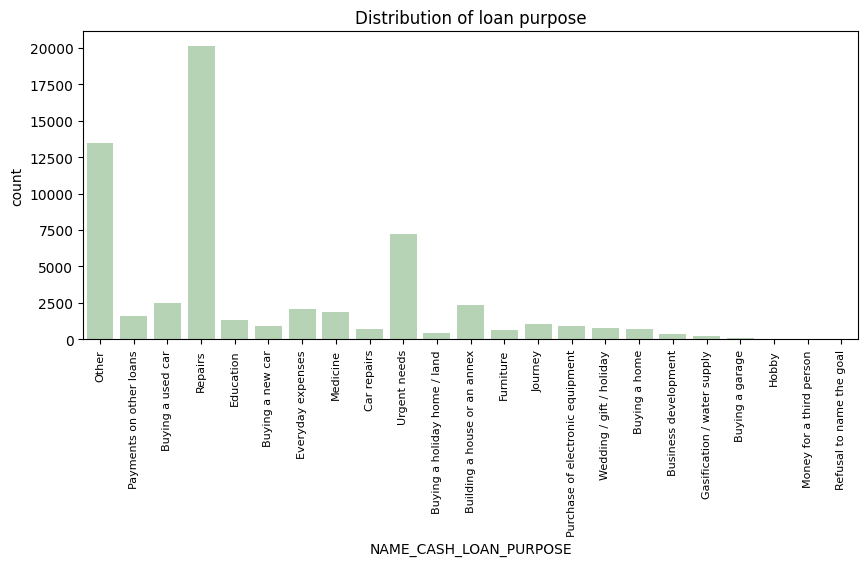

In [117]:
# analyse loan purpose without missing values or unknown data
plt.figure(figsize = (10,4))
filtered_df = merged_df[~merged_df['NAME_CASH_LOAN_PURPOSE'].isin(['XNA', 'XAP'])]  # excluding these missing values to get a clearer picture

# Plot count of loan purposes
sns.countplot(x=filtered_df["NAME_CASH_LOAN_PURPOSE"]  , color = "green" , alpha = 0.3)
plt.title('Distribution of loan purpose')
plt.xticks(rotation=90, fontsize=8)
plt.show()

***Insights***
-  Most common purpose for loan is for 'Repairs' which is around 20000, i.e around 30% of loans, then comes 'Others' and 'Urgent needs'.
-  Other common loan purposes include 'Buying a used car', 'Building a house or an annex' and 'Everyday expenses', which are around approximate 2500.

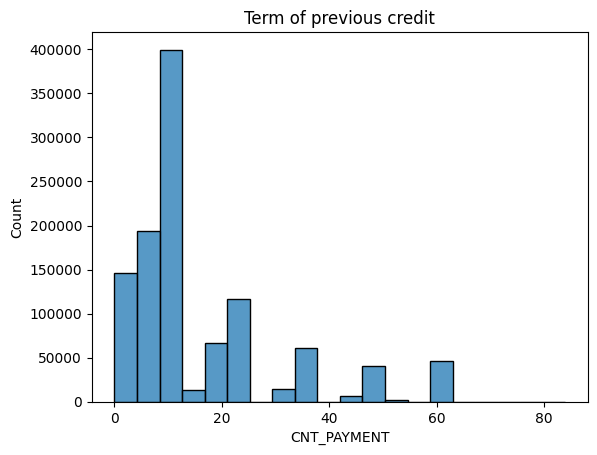

In [118]:
# duration of the loan for the previous credit
sns.histplot(x=merged_df["CNT_PAYMENT"] , bins =20)
plt.title('Term of previous credit')
plt.show()

***Insights***
-  The most common loan terms/duration fall between 10 and 20 months/years (since it is not specified in the dataset).
-  There is a significant decrease in frequency for loan terms longer than 20 months/years.

### Segmented Univariate Analysis

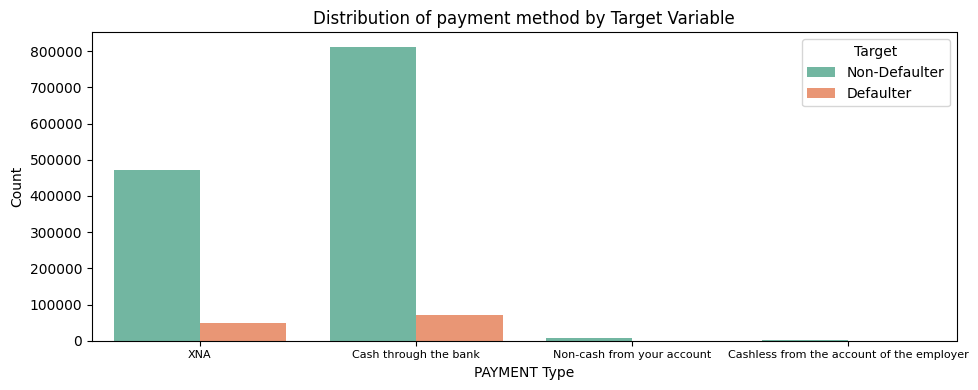

In [119]:
# payment method that a client chose to use for the previous application
plt.figure(figsize=(10, 4))

# Create a bar plot
sns.countplot(x='NAME_PAYMENT_TYPE', hue='TARGET', data=merged_df , palette='Set2')

# Rotate x-axis labels for better readability
plt.xticks(rotation=15)

# Set the title and labels
plt.title('Distribution of payment method by Target Variable')
plt.xlabel('PAYMENT Type')
plt.ylabel('Count')
plt.xticks(rotation = 0 ,fontsize = 8)
plt.legend(title='Target', labels=['Non-Defaulter', 'Defaulter'])
plt.tight_layout()
plt.show()

***Insights***
-  "Cash through the bank" is the most common payment method for both non-defaulters (TARGET = 0) and defaulters (TARGET = 1). A significantly higher number of successful repayments i.e (TARGET = 0), were made using this method compared to defaulters.


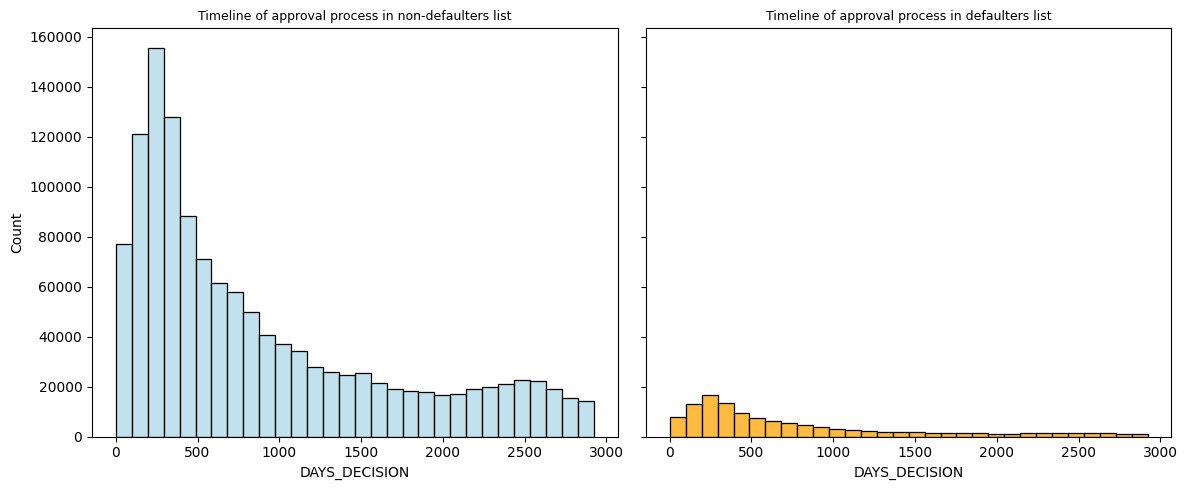

In [120]:
# Timeline of the loan approval process
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Plot histogram for merged_df_target_0
sns.histplot(data=merged_df_target_0, x='DAYS_DECISION', ax=axes[0], color='lightblue', bins=30)
axes[0].set_title('Timeline of approval process in non-defaulters list' , fontsize = 9)


# Plot histogram for merged_df_target_1
sns.histplot(data=merged_df_target_1, x='DAYS_DECISION', ax=axes[1], color='orange', bins=30)
axes[1].set_title('Timeline of approval process in defaulters list',  fontsize =9)


# Adjust layout and display the plot
plt.tight_layout()
plt.show()

***Insights***
-  The decision about the previous application for non-defaulters tends to be made relatively quickly, with a peak around 500 days.
-  For defaulters, the decisions are more spread out, but generally, they are made in less than 1000 days.

### Bivariate Analysis

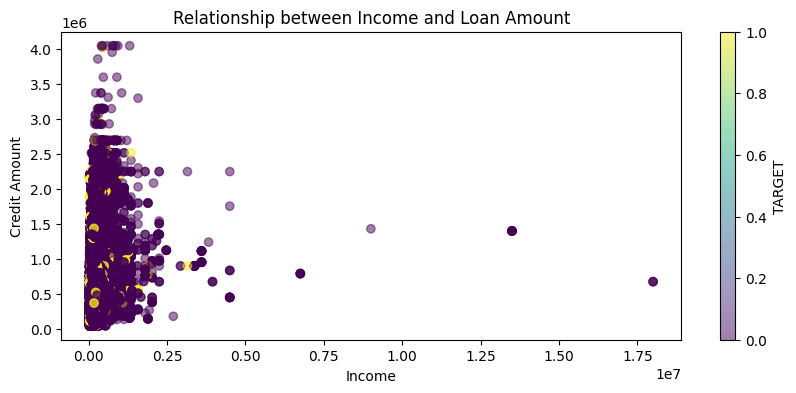

In [121]:
# Income vs Credit Amount w.r.t Target variable
plt.figure(figsize=(10, 4))
plt.scatter(merged_df['AMT_INCOME_TOTAL'], merged_df['AMT_CREDIT_x'], c=merged_df['TARGET'], cmap='viridis', alpha=0.5)
plt.colorbar(label='TARGET')
plt.xlabel('Income')
plt.ylabel('Credit Amount')
plt.title('Relationship between Income and Loan Amount')
plt.show()

***Insights***
-  There is a positive correlation between Income and Loan Amount, as most data points are concentrated at lower values for both variables and follow a very little diagonal pattern towards higher values.
-  Purple dominating yellow, indicates that defaulters more prevalent in the dataset, especially at the lower end of income and loan amounts.

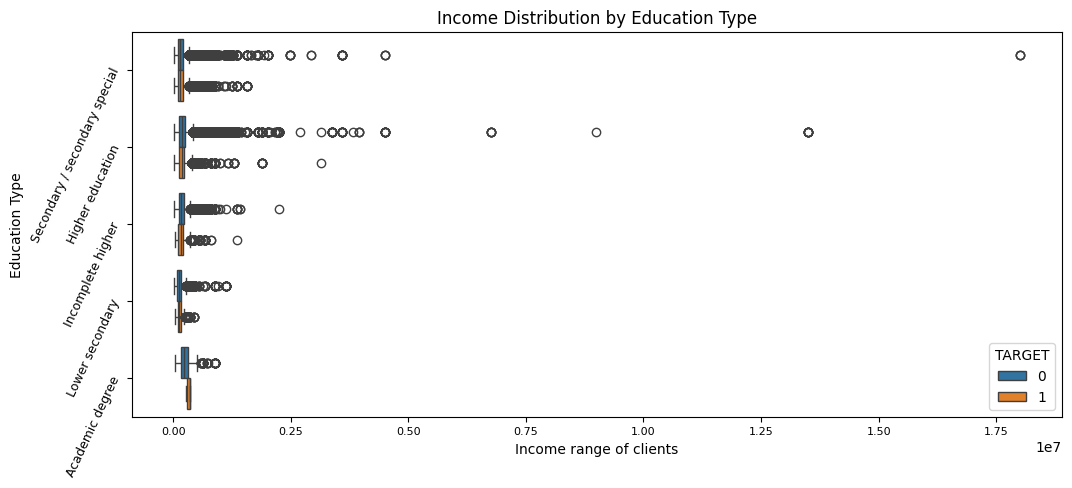

In [122]:
# Income across different education level for each target segment
plt.figure(figsize=(12, 5))
sns.boxplot(y='NAME_EDUCATION_TYPE', x='AMT_INCOME_TOTAL', hue='TARGET', data=merged_df)
plt.xticks(rotation=0 , fontsize = 8)
plt.ylabel('Education Type')
plt.xlabel('Income range of clients')
plt.title('Income Distribution by Education Type')
plt.legend(title='TARGET')
plt.yticks(rotation=65 , fontsize = 9)
plt.show()

***Insights***
-  There is no significant difference in the median income between Non-Defaulters(Target = 0) and Defaulters(Target = 1) across all education levels, except for the presence of outliers, particularly in the ‘Higher Education’ category, indicates that there are individuals with incomes much higher than the median 
-  Individuals with higher levels of education (Academic degree and Higher education) have higher average incomes.  

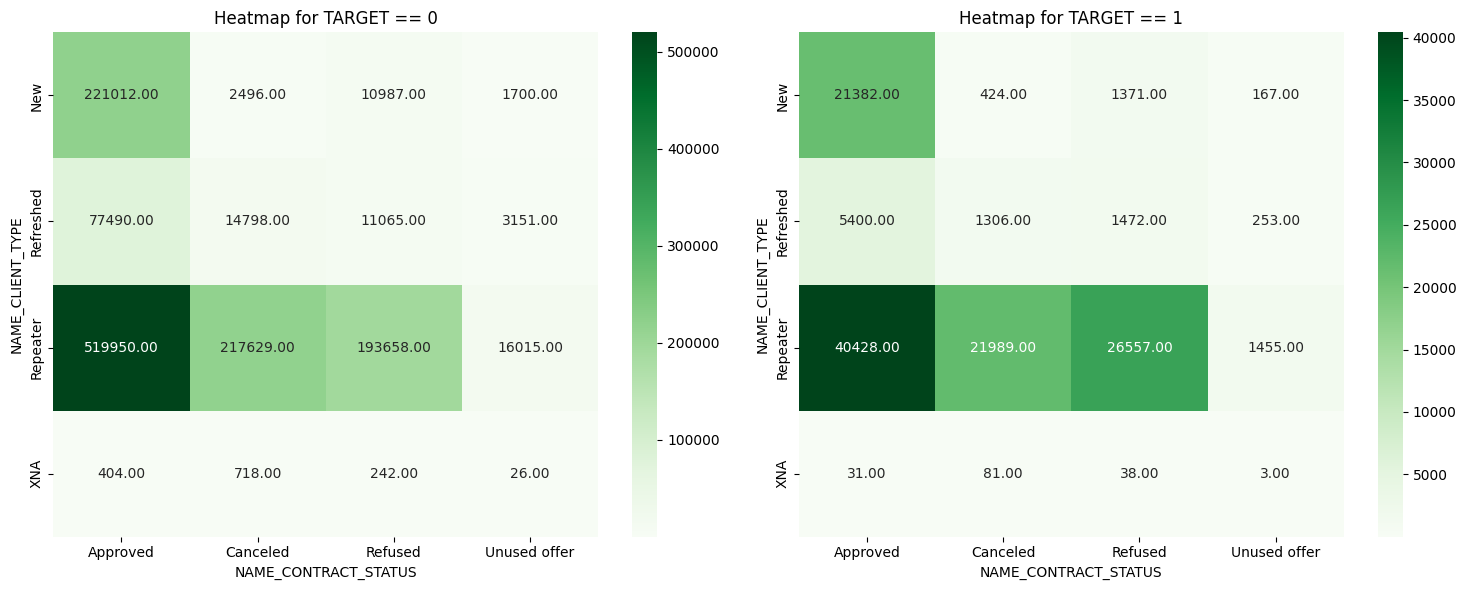

In [123]:
# Counts of different contract statuses across client types, segmented by the target variable

# Create a pivot table for TARGET == 0
pivot_table_0 = merged_df_target_0.pivot_table(index='NAME_CLIENT_TYPE', columns='NAME_CONTRACT_STATUS', values='TARGET', aggfunc='count')

# Create a pivot table for TARGET == 1
pivot_table_1 = merged_df_target_1.pivot_table(index='NAME_CLIENT_TYPE', columns='NAME_CONTRACT_STATUS', values='TARGET', aggfunc='count')

fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Plot the heatmap for TARGET == 0
sns.heatmap(pivot_table_0, annot=True, cmap='Greens', fmt=".2f", ax=axs[0])
axs[0].set_title('Heatmap for TARGET == 0')

# Plot the heatmap for TARGET == 1
sns.heatmap(pivot_table_1, annot=True, cmap='Greens', fmt=".2f", ax=axs[1])
axs[1].set_title('Heatmap for TARGET == 1')


# Adjust layout
plt.tight_layout()

# Show plots
plt.show()

***Insights***
-  The heatmaps provide a visual comparison of the counts of different contract statuses across client types, segmented by the target variable (TARGET == 0 for non-defaulters and TARGET == 1 for defaulters). 
-  'Repeaters' are the most common client type with approved contracts For both TARGET == 0 and TARGET == 1
-  'New Clients' category for Non-defaulters have a higher count of approvals compared to the defaulters.
-  The count of 'refused' contracts for 'Repeaters' are high in loan default as compared to the non-defaulters.

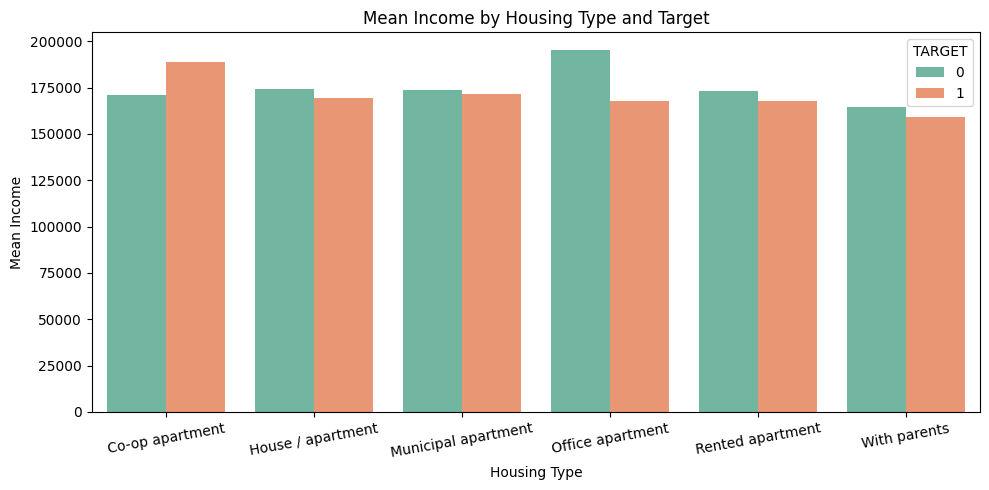

In [124]:
# Average income for housing type of clients
income_mean = merged_df.groupby(['NAME_HOUSING_TYPE', 'TARGET'])['AMT_INCOME_TOTAL'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x='NAME_HOUSING_TYPE', y='AMT_INCOME_TOTAL', hue='TARGET', data=income_mean , palette='Set2')
plt.xlabel('Housing Type')
plt.ylabel('Mean Income')
plt.title('Mean Income by Housing Type and Target')
plt.xticks(rotation=10)
#plt.legend(title='Target', labels=['Non-Defaulter', 'Defaulter'])
plt.tight_layout()
plt.show()

***Insights***
-  For every housing type, the mean income for non-defaulters (TARGET = 0) is slightly higher than for defaulters (TARGET = 1), except for the clients with co-op apartment.
-  Mean-income of deaulters of co-op apartment is greater than their non-defaulter.
-  Mean-income of non-defaulters is highest with the clients having office apartments.

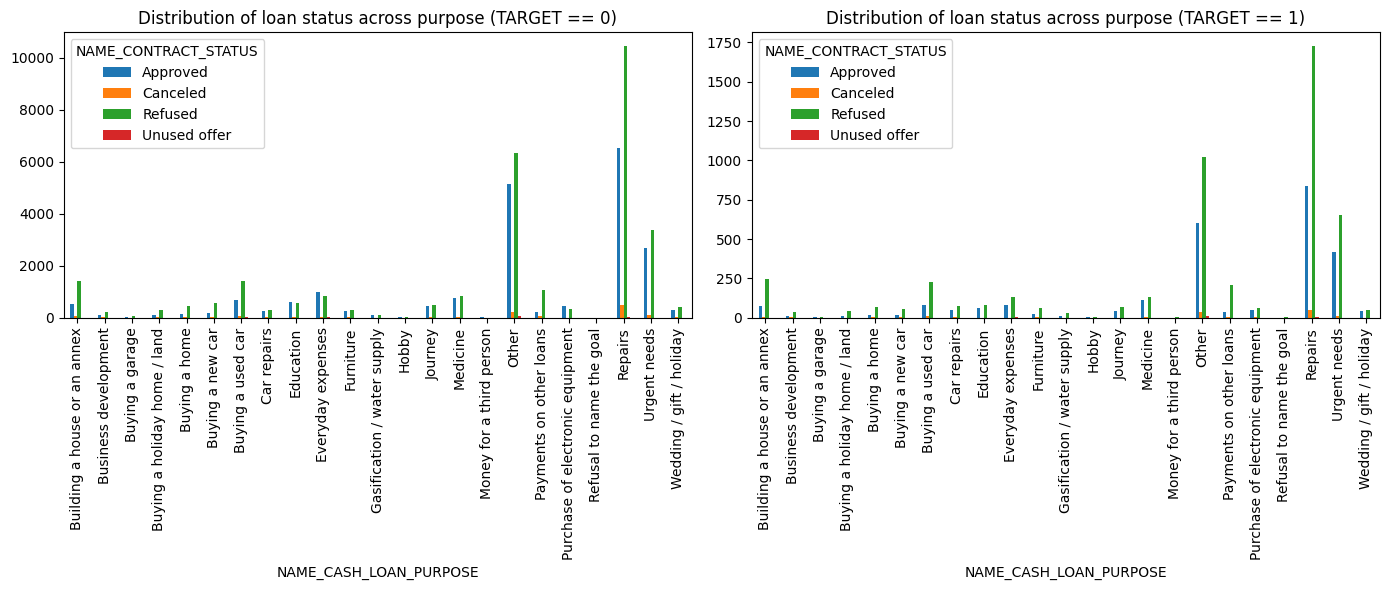

In [125]:
# Loan_status across loan_purpose 

# analysing plot without XAP and XNA category
merged_df_filtered = merged_df[(merged_df['NAME_CASH_LOAN_PURPOSE'] != 'XAP') & (merged_df['NAME_CASH_LOAN_PURPOSE'] != 'XNA') ]

# Create pivot tables for TARGET == 0 and TARGET == 1 separately
pivot_table_0 = merged_df_filtered[merged_df_filtered['TARGET'] == 0].groupby(['NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS'])['NAME_CONTRACT_STATUS'].count().unstack()
pivot_table_1 = merged_df_filtered[merged_df_filtered['TARGET'] == 1].groupby(['NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS'])['NAME_CONTRACT_STATUS'].count().unstack()

# Plot bar charts
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

pivot_table_0.plot(kind='bar', ax=axes[0])
pivot_table_1.plot(kind='bar', ax=axes[1])

axes[0].set_title('Distribution of loan status across purpose (TARGET == 0)')
axes[1].set_title('Distribution of loan status across purpose (TARGET == 1)')

plt.tight_layout()
plt.show()

***Insights***
-  Across both target segment 'Repairs' category has the highest approved and refused loan status, similar with the 'Other' category.
-  For non-defaulters (TARGET == 0), the majority of loans across various purposes are refused, same goes for defaulters (Target ==1)

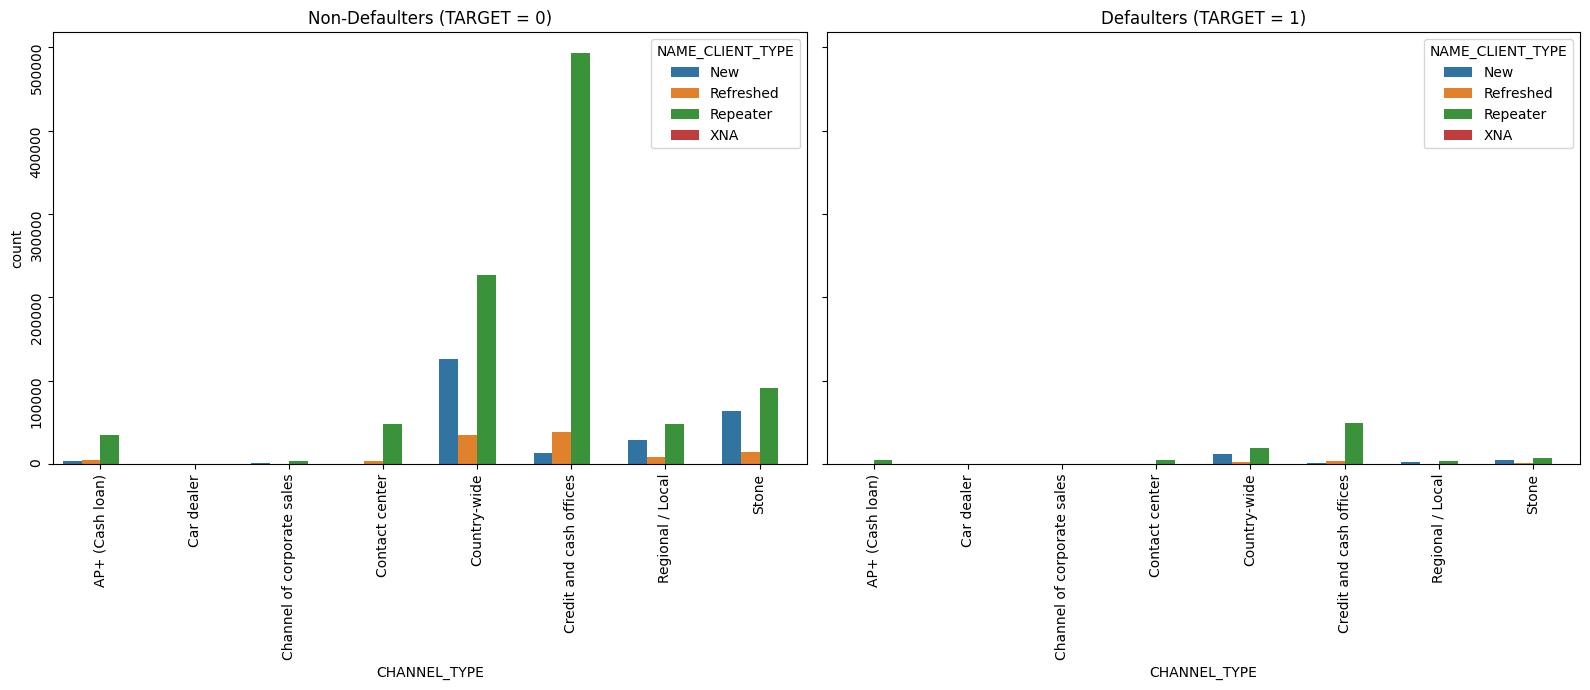

In [126]:
# types of clients from different channels
grouped_0 = merged_df_target_0.groupby(['CHANNEL_TYPE', 'NAME_CLIENT_TYPE'])['TARGET'].size().reset_index(name='count') # use of reset_index() to convert the grouped DataFrame back to a flat DataFrame structure before plotting
grouped_1 = merged_df_target_1.groupby(['CHANNEL_TYPE', 'NAME_CLIENT_TYPE'])['TARGET'].size().reset_index(name='count')

# Create subplots with shared x-axis
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 7), sharey = True)

# Plot for non-defaulters
sns.barplot(data=grouped_0, x='CHANNEL_TYPE', y='count', hue='NAME_CLIENT_TYPE', ax=axes[0])
axes[0].set_title('Non-Defaulters (TARGET = 0)')
axes[0].tick_params(rotation=90)

# Plot for defaulters
sns.barplot(data=grouped_1, x='CHANNEL_TYPE', y='count', hue='NAME_CLIENT_TYPE', ax=axes[1])
axes[1].set_title('Defaulters (TARGET = 1)')
axes[1].tick_params(rotation=90)

plt.tight_layout()
plt.show()

***Insights:***
-  For the Non-Defaulters (TARGET = 0): The "Credit and cash offices" channel has the highest count of clients, with 'Repeaters' being the most prevalent client type.
-  Incase of Non-defaulters, The "Country-wide" channel has a significant number of 'New' clients
-  For Defaulters (TARGET = 1): All channels have fewer defaulting clients compared to non-defaulting ones. 
-  There is increase in refused contracts for 'Repeaters' in the defaulters' category.

In [127]:
# create a variable to add selected numerical variables
numerical_vars = ['DAYS_DECISION', 'DAYS_TERMINATION','AMT_INCOME_TOTAL','AMT_CREDIT_x','AMT_CREDIT_y','TOTALAREA_MODE','DAYS_REGISTRATION','AMT_DOWN_PAYMENT']

# Replace 'XNA' values with NaN for numerical_vars for computation
temp_fill_df_0 = merged_df_target_0[numerical_vars].replace({'XNA': np.nan})
temp_fill_df_1 = merged_df_target_1[numerical_vars].replace({'XNA': np.nan})


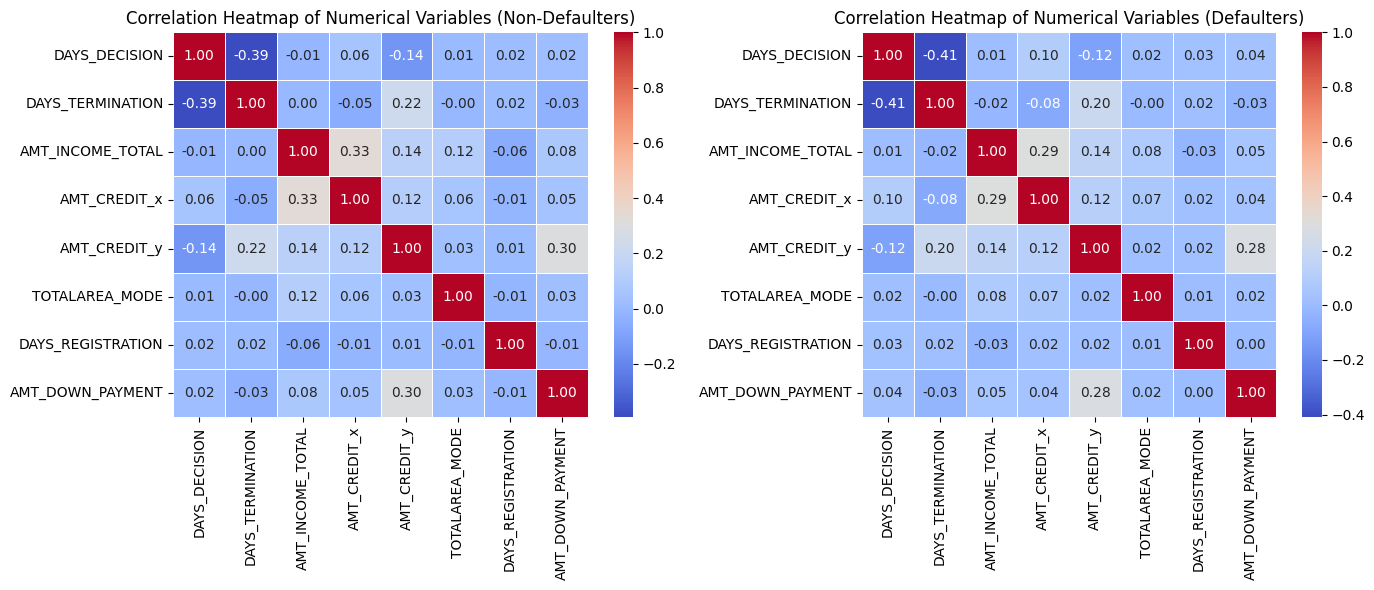

In [128]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Non-defaulters heatmap
sns.heatmap(temp_fill_df_0.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, ax=axes[0])
axes[0].set_title('Correlation Heatmap of Numerical Variables (Non-Defaulters)')

# Defaulters heatmap
sns.heatmap(temp_fill_df_1.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, ax=axes[1])
axes[1].set_title('Correlation Heatmap of Numerical Variables (Defaulters)')

plt.tight_layout()
plt.show()

***Insights:***
-  For relation between variables in both non-defaulters and defaulters plot:
</br>
-  DAYS_DECISION has a weak negative correlation with both loan termination time and income.
-  moderate positive correlation between loan amount (both AMT_CREDIT_x and AMT_CREDIT_y) and income
-  a weak positive correlation between loan amount (AMT_CREDIT_x/y) and down payment
-  weak positive correlation between income and property size (TOTALAREA_MODE)

-  The overall correlation strength among variables is weaker for Defaulters than for Non-Defaulters

***Final Inferences/Predictions:***
-  Despite cash loans being the preferred choice for both defaulters and non-defaulters, the default rate (TARGET = 1) appears to be relatively higher for revolving loans compared to cash loans. This suggests that revolving loans might carry a higher risk of default compared to cash loans.</br>
-  Clients with lower income levels, such as those with lower average income across education levels, tend to have a higher probability of default.</br>
-  Clients with lower scores from both external sources (EXT_SOURCE_2 and EXT_SOURCE_3) are more likely to experience payment difficulties.</br>
-  Moderate interest rates are the most common among clients, suggesting that borrowers prefer a balance between affordability and interest costs. </br>
-  insights suggest that the client's history with the financial institution (as indicated by the client type) (NAME_CLIENT_TYPE) and their previous contract status may be related to their likelihood of defaulting</br>
-  The data suggests that certain channels (CHANNEL_TYPE) are more associated with non-defaulting behavior, particularly 'Credit and cash offices' and 'Country-wide'.</br>